In [7]:
import sys, os, gzip, json
sys.path = [os.path.dirname(os.getcwd())] + sys.path
print(sys.path)
import json

import rdkit
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
print(rdkit.rdBase.rdkitVersion)
from rdkit.Chem import AllChem

import rdchiral
print(rdchiral.__path__)
from rdchiral.main import rdchiralRun, rdchiralRunText, rdchiralReaction, rdchiralReactants

from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 

['/Users/ccoley/rdchiral', '/Users/ccoley/rdchiral', '', '/Users/ccoley/rdchiral/templates', '/Users/ccoley/ASKCOS/Make-It', '/Users/ccoley/ASKCOS/ASKCOS_Website', '/Users/ccoley/deepchem', '/Users/ccoley/rdchiral/templates/\n\nPATH=/opt/local/bin', '/opt/local/sbin', '/Users/ccoley/miniconda3/bin', '/Users/ccoley/miniconda2/bin', '/Usrs/ccoley/deepchem', '/usr/local/bin', '/usr/bin', '/bin', '/usr/sbin', '/sbin', '/Library/TeX/texbin', '/opt/X11/bin', '/usr/local/sbin\n', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python36.zip', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/lib-dynload', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/site-packages', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/site-packages/IPython/extensions', '/Users/ccoley/.ipython']
2018.09.1
['/Users/ccoley/rdchiral/rdchiral']


In [2]:
def sep_bar():
    print('')
    for i in range(3):
        print('='*80)
    print('')

In [3]:
with gzip.open('data/uspto.templates.json.gz') as f:
    templates = json.load(f)
with gzip.open('data/uspto.reactions.json.gz') as f:
    reactions = json.load(f)

In [4]:
templates[:3]

[{'dimer_only': False,
  'intra_only': False,
  'necessary_reagent': '',
  'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]',
  'reactants': 'Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]',
  'reaction_id': 0,
  'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]'},
 {'dimer_only': False,
  'intra_only': False,
  'necessary_reagent': '',
  'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]',
  'reactants': 'Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]',
  'reaction_id': 1,
  'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]'},
 {'dimer_only': False,
  'intra_only': False,
  'necessary_reagent': '',
  'products': '[C:2]-[S;H0;D4;+

In [5]:
reactions[:3]

[{'_id': 0,
  'products': '[CH2:5]([S:7]([O:4][CH2:3][CH2:2][Br:1])(=[O:9])=[O:8])[CH3:6]',
  'reactants': '[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=[O:9])=[O:8])[CH3:6].CCOCC',
  'source': 'uspto',
  'source_id': 'd55b478b903cc66713bcd03da0cb590206c063770b25661297a153ea49f28716',
  'spectators': 'C(N(CC)CC)C'},
 {'_id': 1,
  'products': '[CH3:6][S:7]([O:5][CH2:4][CH2:3][CH2:2][Br:1])(=[O:9])=[O:8]',
  'reactants': '[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7](Cl)(=[O:9])=[O:8].CCOCC',
  'source': 'uspto',
  'source_id': '4f4596769c26752550f51dfa2e2ed3c85314e993098a218c9c8708d24994ef30',
  'spectators': 'C(N(CC)CC)C'},
 {'_id': 2,
  'products': '[CH2:10]([S:14]([O:3][CH2:2][CH2:1][Cl:4])(=[O:16])=[O:15])[CH:11]([CH3:13])[CH3:12]',
  'reactants': '[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S:14](Cl)(=[O:16])=[O:15])[CH:11]([CH3:13])[CH3:12]',
  'source': 'uspto',
  'source_id': 'b437d8086077a93b6c04154fe4ea6b3b8a718cf617fcfd989f1ff51b9ce8087c',
  'spectators': 'C(N(CC)CC)C'}]

In [8]:
reaction_id_to_index = {x['_id']: i for i, x in enumerate(reactions)}

In [9]:
def show_k(k):
    if 'reaction_smarts' not in templates[k]:
        return
    print(k)
    reaction = reactions[reaction_id_to_index[templates[k]['reaction_id']]]
    display(Chem.MolFromSmiles(reaction['reactants'])) 
    print('Reactants: {}'.format(reaction['reactants']))
    display(Chem.MolFromSmiles(reaction['products']))
    print('Products: {}'.format(reaction['products']))
    display(AllChem.ReactionFromSmarts(templates[k]['reaction_smarts']))
    print('Extracted template: {}'.format(templates[k]['reaction_smarts']))
    sep_bar()

### Look at a large number of examples

1150


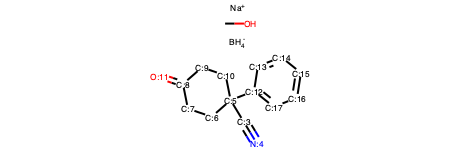

Reactants: CO.[C:3]([C:5]1([C:12]2[CH:17]=[CH:16][CH:15]=[CH:14][CH:13]=2)[CH2:10][CH2:9][C:8](=[O:11])[CH2:7][CH2:6]1)#[N:4].[BH4-].[Na+]


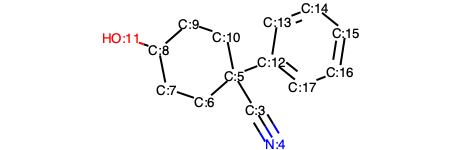

Products: [C:3]([C:5]1([C:12]2[CH:17]=[CH:16][CH:15]=[CH:14][CH:13]=2)[CH2:10][CH2:9][CH:8]([OH:11])[CH2:7][CH2:6]1)#[N:4]


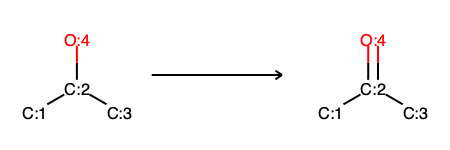

Extracted template: [C:1]-[CH;D3;+0:2](-[C:3])-[OH;D1;+0:4]>>[C:1]-[C;H0;D3;+0:2](-[C:3])=[O;H0;D1;+0:4]


1151


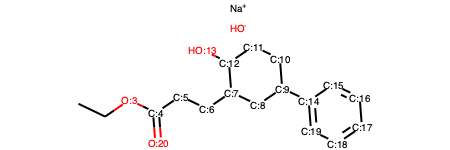

Reactants: C([O:3][C:4](=[O:20])[CH2:5][CH2:6][CH:7]1[CH:12]([OH:13])[CH2:11][CH2:10][CH:9]([C:14]2[CH:19]=[CH:18][CH:17]=[CH:16][CH:15]=2)[CH2:8]1)C.[OH-].[Na+]


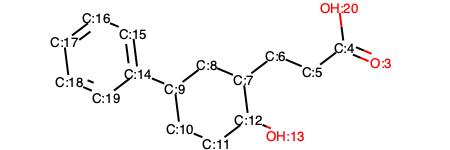

Products: [OH:13][CH:12]1[CH2:11][CH2:10][CH:9]([C:14]2[CH:15]=[CH:16][CH:17]=[CH:18][CH:19]=2)[CH2:8][CH:7]1[CH2:6][CH2:5][C:4]([OH:20])=[O:3]


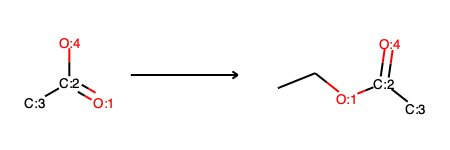

Extracted template: [C:3]-[C;H0;D3;+0:2](=[O;H0;D1;+0:1])-[OH;D1;+0:4]>>C-C-[O;H0;D2;+0:1]-[C;H0;D3;+0:2](-[C:3])=[O;H0;D1;+0:4]


1152


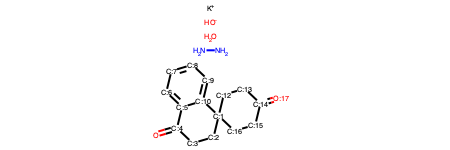

Reactants: [C:1]12([CH2:16][CH2:15][C:14](=[O:17])[CH2:13][CH2:12]1)[C:10]1[C:5](=[CH:6][CH:7]=[CH:8][CH:9]=1)[C:4](=O)[CH2:3][CH2:2]2.O.NN.[OH-].[K+]


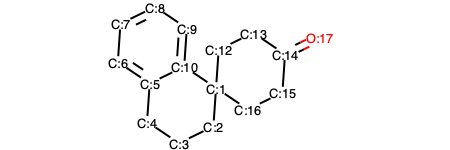

Products: [C:1]12([CH2:16][CH2:15][C:14](=[O:17])[CH2:13][CH2:12]1)[C:10]1[C:5](=[CH:6][CH:7]=[CH:8][CH:9]=1)[CH2:4][CH2:3][CH2:2]2


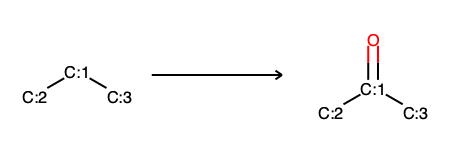

Extracted template: [C:2]-[CH2;D2;+0:1]-[c:3]>>O=[C;H0;D3;+0:1](-[C:2])-[c:3]


1153


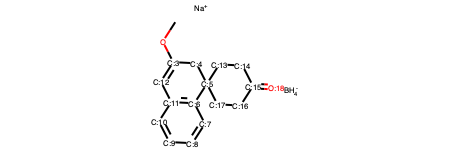

Reactants: CO[C:3]1[CH2:4][C:5]2([CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]2)[C:6]2[C:11]([CH:12]=1)=[CH:10][CH:9]=[CH:8][CH:7]=2.[BH4-].[Na+]


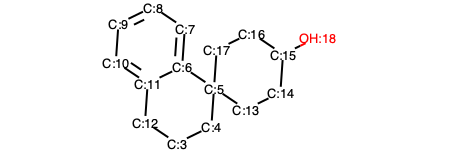

Products: [C:5]12([CH2:13][CH2:14][CH:15]([OH:18])[CH2:16][CH2:17]1)[C:6]1[C:11](=[CH:10][CH:9]=[CH:8][CH:7]=1)[CH2:12][CH2:3][CH2:4]2


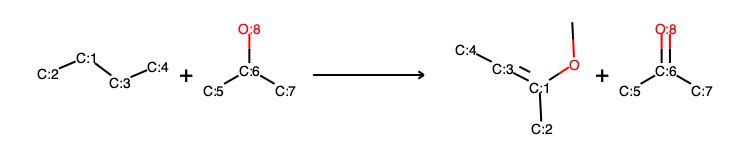

Extracted template: [C:2]-[CH2;D2;+0:1]-[CH2;D2;+0:3]-[c:4].[C:5]-[CH;D3;+0:6](-[C:7])-[OH;D1;+0:8]>>C-O-[C;H0;D3;+0:1](-[C:2])=[CH;D2;+0:3]-[c:4].[C:5]-[C;H0;D3;+0:6](-[C:7])=[O;H0;D1;+0:8]


1154


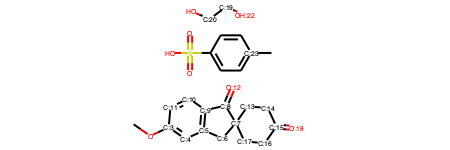

Reactants: CO[C:3]1[CH:4]=[C:5]2[C:9](=[CH:10][CH:11]=1)[C:8](=[O:12])[C:7]1([CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]1)[CH2:6]2.[CH2:19]([OH:22])[CH2:20]O.[C:23]1(C)C=CC(S(O)(=O)=O)=CC=1


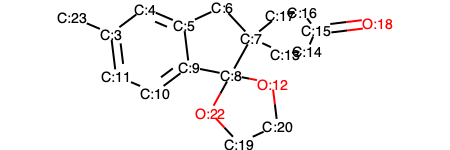

Products: [CH2:20]1[O:12][C:8]2([C:9]3[C:5](=[CH:4][C:3]([CH3:23])=[CH:11][CH:10]=3)[CH2:6][C:7]32[CH2:13][CH2:14][C:15](=[O:18])[CH2:16][CH2:17]3)[O:22][CH2:19]1


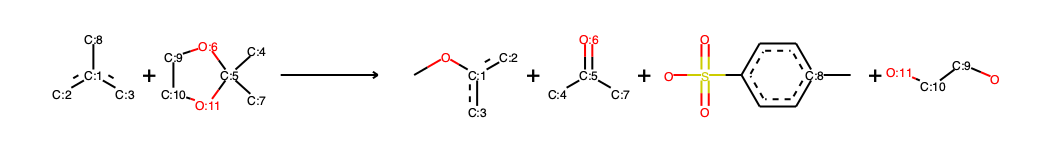

Extracted template: [CH3;D1;+0:8]-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]-[C;H0;D4;+0:5]1(-[c:7])-[O;H0;D2;+0:6]-[CH2;D2;+0:9]-[C:10]-[O;H0;D2;+0:11]-1>>C-O-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]-[C;H0;D3;+0:5](=[O;H0;D1;+0:6])-[c:7].C-[c;H0;D3;+0:8]1:c:c:c(-S(-O)(=O)=O):c:c:1.O-[CH2;D2;+0:9]-[C:10]-[OH;D1;+0:11]


1155


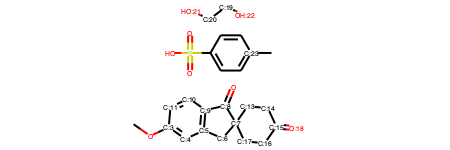

Reactants: CO[C:3]1[CH:4]=[C:5]2[C:9](=[CH:10][CH:11]=1)[C:8](=O)[C:7]1([CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]1)[CH2:6]2.[CH2:19]([OH:22])[CH2:20][OH:21].[C:23]1(C)C=CC(S(O)(=O)=O)=CC=1


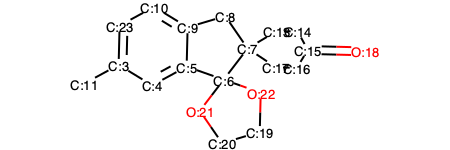

Products: [CH2:19]1[O:22][C:6]2([C:5]3[C:9](=[CH:10][CH:23]=[C:3]([CH3:11])[CH:4]=3)[CH2:8][C:7]32[CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]3)[O:21][CH2:20]1


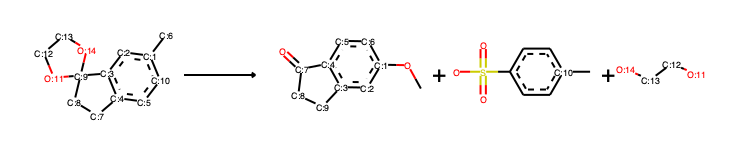

Extracted template: [CH3;D1;+0:6]-[c;H0;D3;+0:1]1:[c:2]:[c:3]2:[c:4](:[cH;D2;+0:5]:[cH;D2;+0:10]:1)-[CH2;D2;+0:7]-[C:8]-[C;H0;D4;+0:9]-21-[O;H0;D2;+0:11]-[C:12]-[C:13]-[O;H0;D2;+0:14]-1>>C-O-[c;H0;D3;+0:1]1:[c:2]:[c:3]2:[c:4](:[cH;D2;+0:5]:[cH;D2;+0:6]:1)-[C;H0;D3;+0:7](=O)-[C:8]-[CH2;D2;+0:9]-2.C-[c;H0;D3;+0:10]1:c:c:c(-S(-O)(=O)=O):c:c:1.[OH;D1;+0:11]-[C:12]-[C:13]-[OH;D1;+0:14]


1156


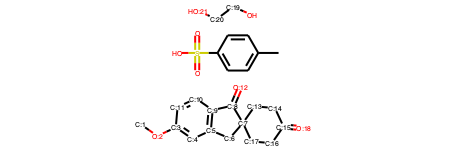

Reactants: [CH3:1][O:2][C:3]1[CH:4]=[C:5]2[C:9](=[CH:10][CH:11]=1)[C:8](=[O:12])[C:7]1([CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]1)[CH2:6]2.[CH2:19](O)[CH2:20][OH:21].C1(C)C=CC(S(O)(=O)=O)=CC=1


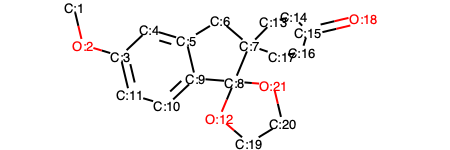

Products: [CH2:20]1[O:21][C:8]2([C:9]3[C:5](=[CH:4][C:3]([O:2][CH3:1])=[CH:11][CH:10]=3)[CH2:6][C:7]32[CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]3)[O:12][CH2:19]1


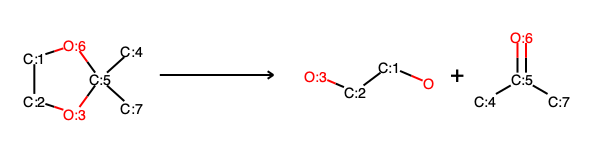

Extracted template: [C:4]-[C;H0;D4;+0:5]1(-[c:7])-[O;H0;D2;+0:6]-[CH2;D2;+0:1]-[C:2]-[O;H0;D2;+0:3]-1>>O-[CH2;D2;+0:1]-[C:2]-[OH;D1;+0:3].[C:4]-[C;H0;D3;+0:5](=[O;H0;D1;+0:6])-[c:7]


1157


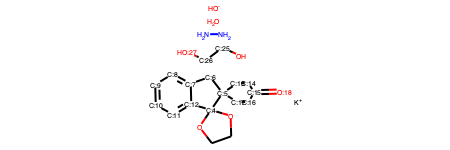

Reactants: C1O[C:4]2([C:12]3[C:7](=[CH:8][CH:9]=[CH:10][CH:11]=3)[CH2:6][C:5]32[CH2:17][CH2:16][C:15](=[O:18])[CH2:14][CH2:13]3)OC1.O.NN.[OH-].[K+].[CH2:25](O)[CH2:26][OH:27]


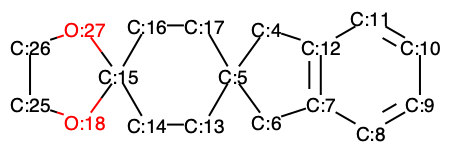

Products: [CH2:25]1[O:18][C:15]2([CH2:14][CH2:13][C:5]3([CH2:4][C:12]4[C:7](=[CH:8][CH:9]=[CH:10][CH:11]=4)[CH2:6]3)[CH2:17][CH2:16]2)[O:27][CH2:26]1


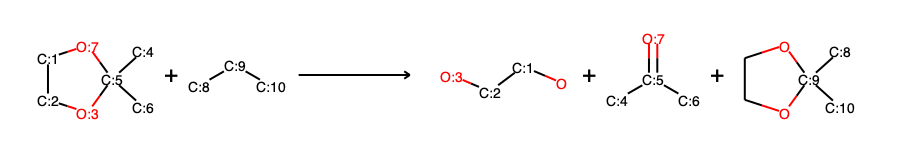

Extracted template: [C:4]-[C;H0;D4;+0:5]1(-[C:6])-[O;H0;D2;+0:7]-[CH2;D2;+0:1]-[C:2]-[O;H0;D2;+0:3]-1.[C:8]-[CH2;D2;+0:9]-[c:10]>>O-[CH2;D2;+0:1]-[C:2]-[OH;D1;+0:3].[C:4]-[C;H0;D3;+0:5](-[C:6])=[O;H0;D1;+0:7].[C:8]-[C;H0;D4;+0:9]1(-[c:10])-O-C-C-O-1


1158


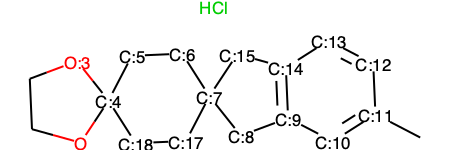

Reactants: C1O[C:4]2([CH2:18][CH2:17][C:7]3([CH2:15][C:14]4[C:9](=[CH:10][C:11](C)=[CH:12][CH:13]=4)[CH2:8]3)[CH2:6][CH2:5]2)[O:3]C1.Cl


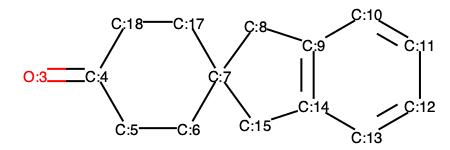

Products: [CH2:8]1[C:9]2[C:14](=[CH:13][CH:12]=[CH:11][CH:10]=2)[CH2:15][C:7]21[CH2:17][CH2:18][C:4](=[O:3])[CH2:5][CH2:6]2


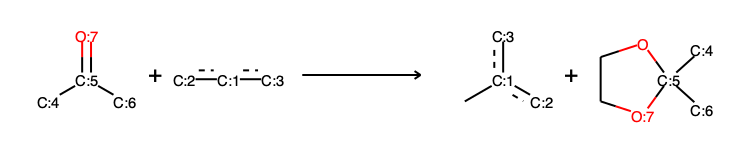

Extracted template: [C:4]-[C;H0;D3;+0:5](-[C:6])=[O;H0;D1;+0:7].[c:2]:[cH;D2;+0:1]:[c:3]>>C-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]-[C;H0;D4;+0:5]1(-[C:6])-O-C-C-[O;H0;D2;+0:7]-1


1159


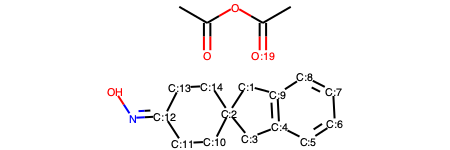

Reactants: [CH2:1]1[C:9]2[C:4](=[CH:5][CH:6]=[CH:7][CH:8]=2)[CH2:3][C:2]21[CH2:14][CH2:13][C:12](=NO)[CH2:11][CH2:10]2.C(OC(=O)C)(=[O:19])C


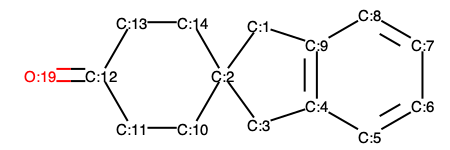

Products: [CH2:1]1[C:9]2[C:4](=[CH:5][CH:6]=[CH:7][CH:8]=2)[CH2:3][C:2]21[CH2:14][CH2:13][C:12](=[O:19])[CH2:11][CH2:10]2


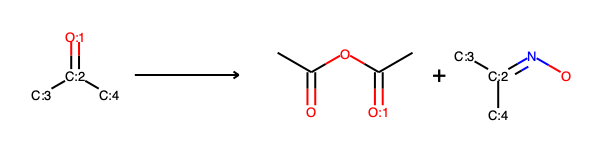

Extracted template: [C:3]-[C;H0;D3;+0:2](-[C:4])=[O;H0;D1;+0:1]>>C-C(=O)-O-C(-C)=[O;H0;D1;+0:1].O-N=[C;H0;D3;+0:2](-[C:3])-[C:4]


1160


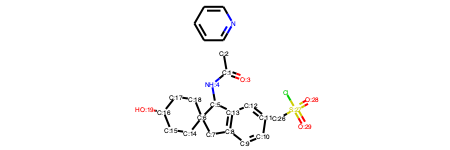

Reactants: [C:1]([NH:4][CH:5]1[C:13]2[C:8](=[CH:9][CH:10]=[CH:11][CH:12]=2)[CH2:7][C:6]21[CH2:18][CH2:17][CH:16]([OH:19])[CH2:15][CH2:14]2)(=[O:3])[CH3:2].N1C=CC=CC=1.[CH3:26][S:27](Cl)(=[O:29])=[O:28]


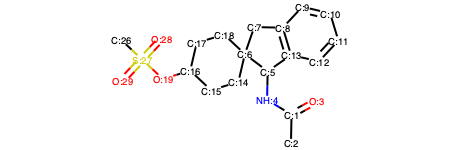

Products: [CH3:26][S:27]([O:19][CH:16]1[CH2:17][CH2:18][C:6]2([CH2:7][C:8]3[C:13](=[CH:12][CH:11]=[CH:10][CH:9]=3)[CH:5]2[NH:4][C:1](=[O:3])[CH3:2])[CH2:14][CH2:15]1)(=[O:29])=[O:28]


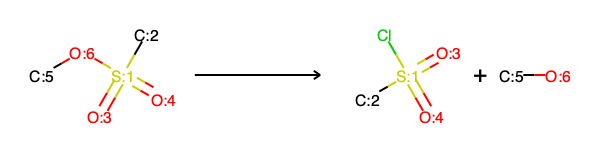

Extracted template: [C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]


1161


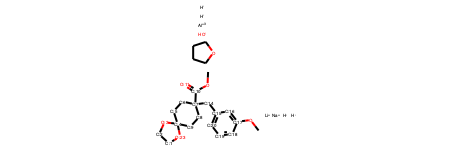

Reactants: [CH2:1]1[O:23][C:4]2([CH2:9][CH2:8][C:7]([CH2:14][C:15]3[CH:20]=[CH:19][CH:18]=[C:17](OC)[CH:16]=3)([C:10](OC)=[O:11])[CH2:6][CH2:5]2)[O:3][CH2:2]1.O1CCCC1.[H-].[Al+3].[Li+].[H-].[H-].[H-].[OH-].[Na+]


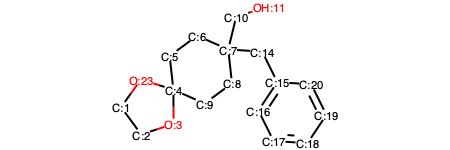

Products: [CH2:2]1[O:3][C:4]2([CH2:9][CH2:8][C:7]([CH2:14][C:15]3[CH:16]=[CH:17][CH:18]=[CH:19][CH:20]=3)([CH2:10][OH:11])[CH2:6][CH2:5]2)[O:23][CH2:1]1


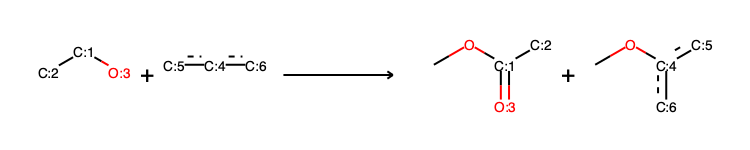

Extracted template: [C:2]-[CH2;D2;+0:1]-[OH;D1;+0:3].[c:5]:[cH;D2;+0:4]:[c:6]>>C-O-[C;H0;D3;+0:1](-[C:2])=[O;H0;D1;+0:3].C-O-[c;H0;D3;+0:4](:[c:5]):[c:6]


1162


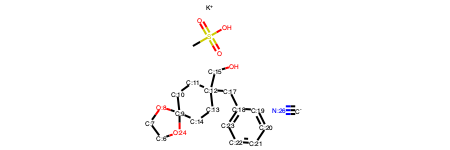

Reactants: CS(O)(=O)=O.[CH2:6]1[O:24][C:9]2([CH2:14][CH2:13][C:12]([CH2:17][C:18]3[CH:23]=[CH:22][CH:21]=[CH:20][CH:19]=3)([CH2:15]O)[CH2:11][CH2:10]2)[O:8][CH2:7]1.[C-]#[N:26].[K+]


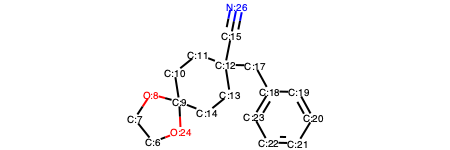

Products: [CH2:6]1[O:24][C:9]2([CH2:14][CH2:13][C:12]([CH2:17][C:18]3[CH:23]=[CH:22][CH:21]=[CH:20][CH:19]=3)([C:15]#[N:26])[CH2:11][CH2:10]2)[O:8][CH2:7]1


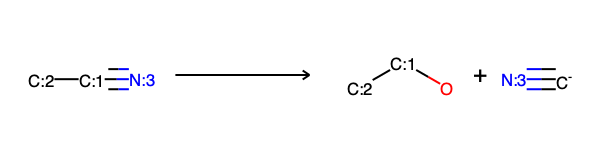

Extracted template: [C:2]-[C;H0;D2;+0:1]#[N;H0;D1;+0:3]>>O-[CH2;D2;+0:1]-[C:2].[C-]#[N;H0;D1;+0:3]


1163


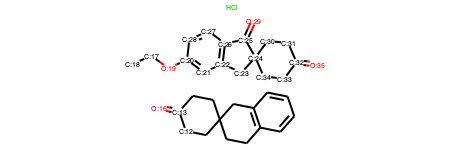

Reactants: C1C2C(=CC=CC=2)CCC21CC[C:13](=[O:16])[CH2:12]C2.[CH2:17]([O:19][C:20]1[CH:21]=[C:22]2[C:26](=[CH:27][CH:28]=1)[C:25](=[O:29])[C:24]1([CH2:34][CH2:33][C:32](=[O:35])[CH2:31][CH2:30]1)[CH2:23]2)[CH3:18].Cl


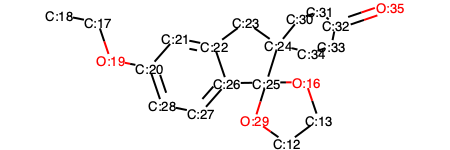

Products: [CH2:13]1[O:16][C:25]2([C:26]3[C:22](=[CH:21][C:20]([O:19][CH2:17][CH3:18])=[CH:28][CH:27]=3)[CH2:23][C:24]32[CH2:34][CH2:33][C:32](=[O:35])[CH2:31][CH2:30]3)[O:29][CH2:12]1


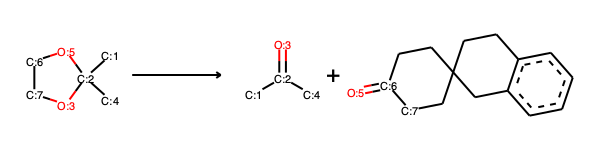

Extracted template: [C:1]-[C;H0;D4;+0:2]1(-[c:4])-[O;H0;D2;+0:5]-[CH2;D2;+0:6]-[CH2;D2;+0:7]-[O;H0;D2;+0:3]-1>>[C:1]-[C;H0;D3;+0:2](=[O;H0;D1;+0:3])-[c:4].[O;H0;D1;+0:5]=[C;H0;D3;+0:6]1-C-C-C2(-C-C-c3:c:c:c:c:c:3-C-2)-C-[CH2;D2;+0:7]-1


1164


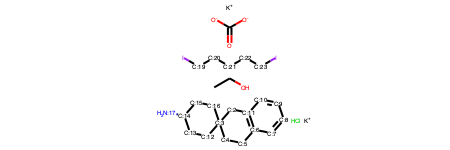

Reactants: Cl.[CH2:2]1[C:11]2[C:6](=[CH:7][CH:8]=[CH:9][CH:10]=2)[CH2:5][CH2:4][C:3]21[CH2:16][CH2:15][CH:14]([NH2:17])[CH2:13][CH2:12]2.I[CH2:19][CH2:20][CH2:21][CH2:22][CH2:23]I.C(=O)([O-])[O-].[K+].[K+].C(O)C


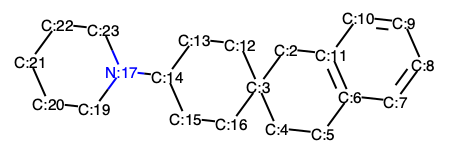

Products: [CH2:2]1[C:11]2[C:6](=[CH:7][CH:8]=[CH:9][CH:10]=2)[CH2:5][CH2:4][C:3]21[CH2:12][CH2:13][CH:14]([N:17]1[CH2:23][CH2:22][CH2:21][CH2:20][CH2:19]1)[CH2:15][CH2:16]2


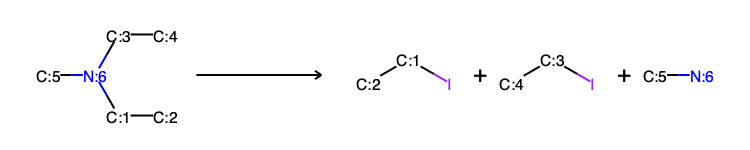

Extracted template: [C:5]-[N;H0;D3;+0:6](-[CH2;D2;+0:1]-[C:2])-[CH2;D2;+0:3]-[C:4]>>I-[CH2;D2;+0:1]-[C:2].I-[CH2;D2;+0:3]-[C:4].[C:5]-[NH2;D1;+0:6]


1165


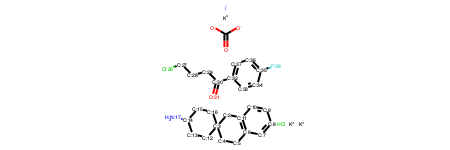

Reactants: Cl.[CH2:2]1[C:11]2[C:6](=[CH:7][CH:8]=[CH:9][CH:10]=2)[CH2:5][CH2:4][C:3]21[CH2:16][CH2:15][CH:14]([NH2:17])[CH2:13][CH2:12]2.[I-].[K+].C(=O)([O-])[O-].[K+].[K+].[Cl:26][CH2:27][CH2:28][CH2:29][C:30]([C:32]1[CH:37]=[CH:36][C:35]([F:38])=[CH:34][CH:33]=1)=[O:31]


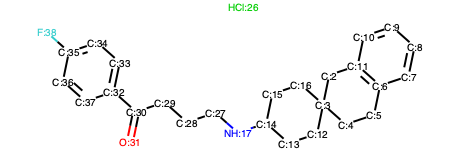

Products: [ClH:26].[F:38][C:35]1[CH:34]=[CH:33][C:32]([C:30](=[O:31])[CH2:29][CH2:28][CH2:27][NH:17][CH:14]2[CH2:13][CH2:12][C:3]3([CH2:4][CH2:5][C:6]4[C:11](=[CH:10][CH:9]=[CH:8][CH:7]=4)[CH2:2]3)[CH2:16][CH2:15]2)=[CH:37][CH:36]=1


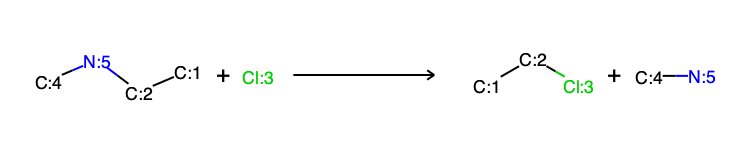

Extracted template: [C:4]-[NH;D2;+0:5]-[CH2;D2;+0:2]-[C:1].[ClH;D0;+0:3]>>[C:1]-[CH2;D2;+0:2]-[Cl;H0;D1;+0:3].[C:4]-[NH2;D1;+0:5]


1166


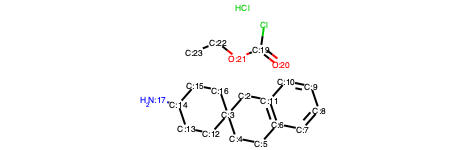

Reactants: Cl.[CH2:2]1[C:11]2[C:6](=[CH:7][CH:8]=[CH:9][CH:10]=2)[CH2:5][CH2:4][C:3]21[CH2:16][CH2:15][CH:14]([NH2:17])[CH2:13][CH2:12]2.Cl[C:19]([O:21][CH2:22][CH3:23])=[O:20]


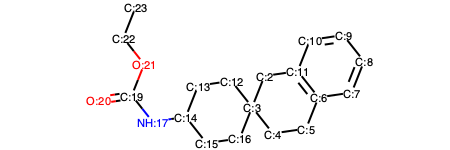

Products: [CH2:2]1[C:11]2[C:6](=[CH:7][CH:8]=[CH:9][CH:10]=2)[CH2:5][CH2:4][C:3]21[CH2:12][CH2:13][CH:14]([NH:17][C:19]([O:21][CH2:22][CH3:23])=[O:20])[CH2:15][CH2:16]2


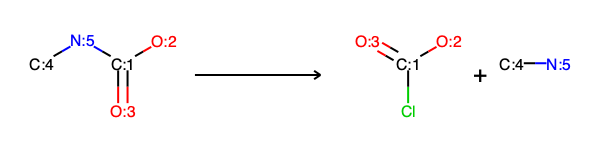

Extracted template: [#8:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:5]-[C:4]>>Cl-[C;H0;D3;+0:1](-[#8:2])=[O;D1;H0:3].[C:4]-[NH2;D1;+0:5]


1167


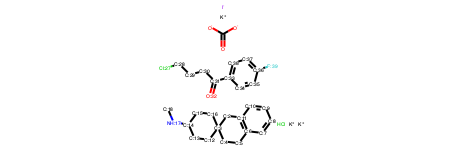

Reactants: Cl.[CH2:2]1[C:11]2[C:6](=[CH:7][CH:8]=[CH:9][CH:10]=2)[CH2:5][CH2:4][C:3]21[CH2:16][CH2:15][CH:14]([NH:17][CH3:18])[CH2:13][CH2:12]2.[I-].[K+].C(=O)([O-])[O-].[K+].[K+].[Cl:27][CH2:28][CH2:29][CH2:30][C:31]([C:33]1[CH:38]=[CH:37][C:36]([F:39])=[CH:35][CH:34]=1)=[O:32]


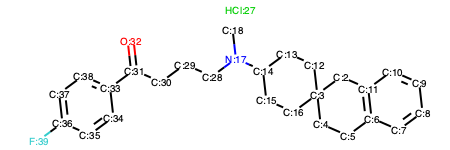

Products: [ClH:27].[F:39][C:36]1[CH:37]=[CH:38][C:33]([C:31](=[O:32])[CH2:30][CH2:29][CH2:28][N:17]([CH:14]2[CH2:15][CH2:16][C:3]3([CH2:4][CH2:5][C:6]4[C:11](=[CH:10][CH:9]=[CH:8][CH:7]=4)[CH2:2]3)[CH2:12][CH2:13]2)[CH3:18])=[CH:34][CH:35]=1


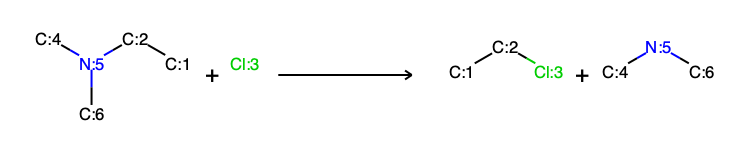

Extracted template: [C:4]-[N;H0;D3;+0:5](-[C;D1;H3:6])-[CH2;D2;+0:2]-[C:1].[ClH;D0;+0:3]>>[C:1]-[CH2;D2;+0:2]-[Cl;H0;D1;+0:3].[C:4]-[NH;D2;+0:5]-[C;D1;H3:6]


1168


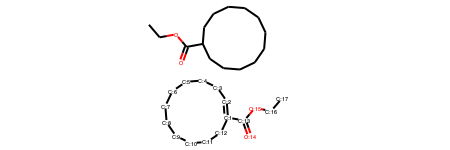

Reactants: [C:1]1([C:13]([O:15][CH2:16][CH3:17])=[O:14])[CH2:12][CH2:11][CH2:10][CH2:9][CH2:8][CH2:7][CH2:6][CH2:5][CH2:4][CH2:3][CH:2]=1.C1(C(OCC)=O)CCCCCCCCCCC1


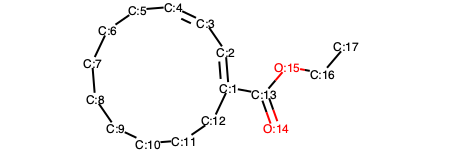

Products: [C:1]1([C:13]([O:15][CH2:16][CH3:17])=[O:14])[CH2:12][CH2:11][CH2:10][CH2:9][CH2:8][CH2:7][CH2:6][CH2:5][CH:4]=[CH:3][CH:2]=1


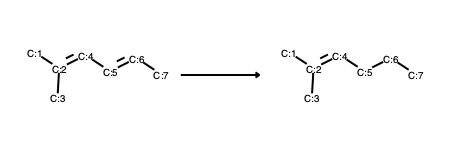

Extracted template: [C:1]-[C:2](-[C:3])=[C:4]-[CH;D2;+0:5]=[CH;D2;+0:6]-[C:7]>>[C:1]-[C:2](-[C:3])=[C:4]-[CH2;D2;+0:5]-[CH2;D2;+0:6]-[C:7]


1169


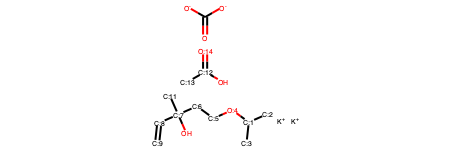

Reactants: [CH:1]([O:4][CH2:5][CH2:6][C:7]([CH3:11])(O)[CH:8]=[CH2:9])([CH3:3])[CH3:2].[C:12](O)(=[O:14])[CH3:13].C(=O)([O-])[O-].[K+].[K+]


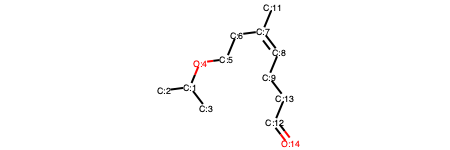

Products: [CH:1]([O:4][CH2:5][CH2:6][C:7]([CH3:11])=[CH:8][CH2:9][CH2:13][CH:12]=[O:14])([CH3:3])[CH3:2]


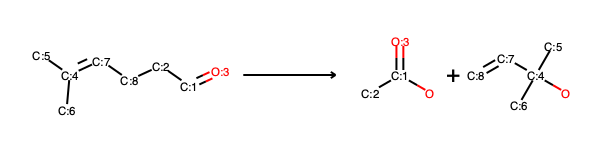

Extracted template: [C:5]-[C;H0;D3;+0:4](-[C;D1;H3:6])=[CH;D2;+0:7]-[CH2;D2;+0:8]-[CH2;D2;+0:2]-[CH;D2;+0:1]=[O;D1;H0:3]>>O-[C;H0;D3;+0:1](-[CH3;D1;+0:2])=[O;D1;H0:3].O-[C;H0;D4;+0:4](-[C:5])(-[C;D1;H3:6])-[CH;D2;+0:7]=[CH2;D1;+0:8]


1170


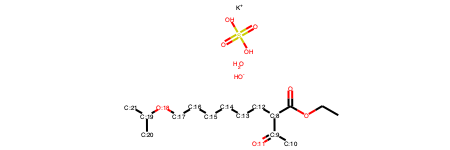

Reactants: [OH-].[K+].C([CH:8]([CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][O:18][CH:19]([CH3:21])[CH3:20])[C:9](=[O:11])[CH3:10])(OCC)=O.S(=O)(=O)(O)O.O


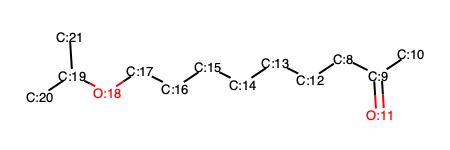

Products: [CH:19]([O:18][CH2:17][CH2:16][CH2:15][CH2:14][CH2:13][CH2:12][CH2:8][C:9](=[O:11])[CH3:10])([CH3:21])[CH3:20]


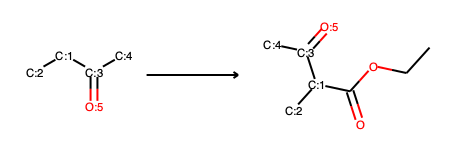

Extracted template: [C:2]-[CH2;D2;+0:1]-[C:3](-[C;D1;H3:4])=[O;D1;H0:5]>>C-C-O-C(=O)-[CH;D3;+0:1](-[C:2])-[C:3](-[C;D1;H3:4])=[O;D1;H0:5]


1171


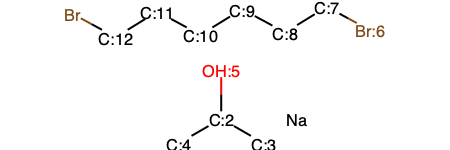

Reactants: [Na].[CH:2]([OH:5])([CH3:4])[CH3:3].[Br:6][CH2:7][CH2:8][CH2:9][CH2:10][CH2:11][CH2:12]Br


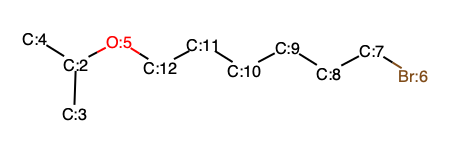

Products: [Br:6][CH2:7][CH2:8][CH2:9][CH2:10][CH2:11][CH2:12][O:5][CH:2]([CH3:4])[CH3:3]


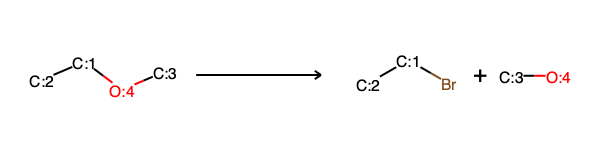

Extracted template: [C:2]-[CH2;D2;+0:1]-[O;H0;D2;+0:4]-[C:3]>>Br-[CH2;D2;+0:1]-[C:2].[C:3]-[OH;D1;+0:4]


1172


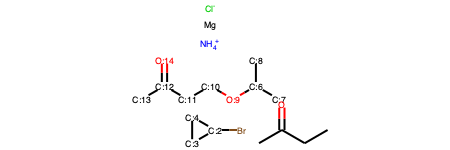

Reactants: [Mg].[CH:2]1(Br)[CH2:4][CH2:3]1.[CH:6]([O:9][CH2:10][CH2:11][C:12](=[O:14])[CH3:13])([CH3:8])[CH3:7].CC(=O)CC.[Cl-].[NH4+]


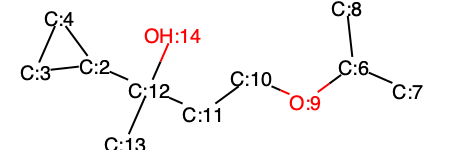

Products: [CH:2]1([C:12]([OH:14])([CH2:11][CH2:10][O:9][CH:6]([CH3:8])[CH3:7])[CH3:13])[CH2:4][CH2:3]1


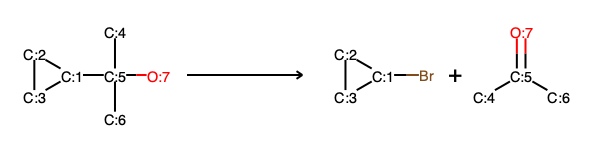

Extracted template: [C:4]-[C;H0;D4;+0:5](-[C;D1;H3:6])(-[OH;D1;+0:7])-[CH;D3;+0:1]1-[C:2]-[C:3]-1>>Br-[CH;D3;+0:1]1-[C:2]-[C:3]-1.[C:4]-[C;H0;D3;+0:5](-[C;D1;H3:6])=[O;H0;D1;+0:7]


1173


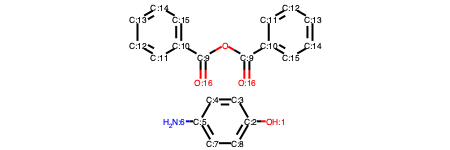

Reactants: [OH:1][C:2]1[CH:8]=[CH:7][C:5]([NH2:6])=[CH:4][CH:3]=1.[C:9](O[C:9](=[O:16])[C:10]1[CH:15]=[CH:14][CH:13]=[CH:12][CH:11]=1)(=[O:16])[C:10]1[CH:15]=[CH:14][CH:13]=[CH:12][CH:11]=1


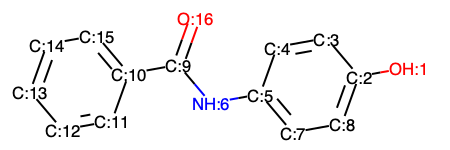

Products: [C:9]([NH:6][C:5]1[CH:7]=[CH:8][C:2]([OH:1])=[CH:3][CH:4]=1)(=[O:16])[C:10]1[CH:15]=[CH:14][CH:13]=[CH:12][CH:11]=1


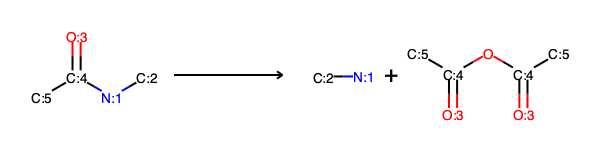

Extracted template: [O;D1;H0:3]=[C;H0;D3;+0:4](-[c:5])-[NH;D2;+0:1]-[c:2]>>[NH2;D1;+0:1]-[c:2].[O;D1;H0:3]=[C;H0;D3;+0:4](-[c:5])-O-[C;H0;D3;+0:4](=[O;D1;H0:3])-[c:5]


1174


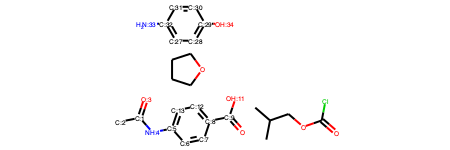

Reactants: [C:1]([NH:4][C:5]1[CH:13]=[CH:12][C:8]([C:9]([OH:11])=O)=[CH:7][CH:6]=1)(=[O:3])[CH3:2].O1CCCC1.C(OC(Cl)=O)C(C)C.[CH:27]1[C:32]([NH2:33])=[CH:31][CH:30]=[C:29]([OH:34])[CH:28]=1


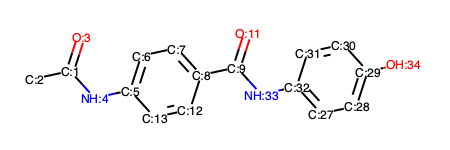

Products: [C:1]([NH:4][C:5]1[CH:6]=[CH:7][C:8]([C:9]([NH:33][C:32]2[CH:27]=[CH:28][C:29]([OH:34])=[CH:30][CH:31]=2)=[O:11])=[CH:12][CH:13]=1)(=[O:3])[CH3:2]


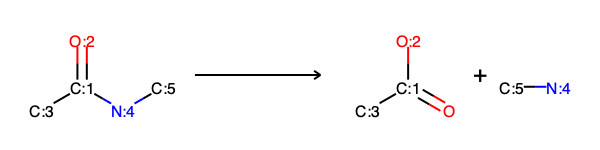

Extracted template: [O;H0;D1;+0:2]=[C;H0;D3;+0:1](-[c:3])-[NH;D2;+0:4]-[c:5]>>O=[C;H0;D3;+0:1](-[OH;D1;+0:2])-[c:3].[NH2;D1;+0:4]-[c:5]


1175


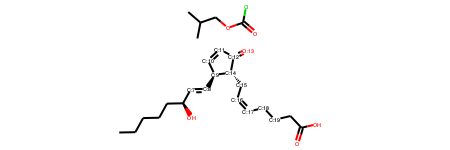

Reactants: CCCCC[C@H](O)/[CH:7]=[CH:8]/[C@@H:9]1[C@@H:14]([CH2:15]/[CH:16]=[CH:17]\[CH2:18][CH2:19]CC(O)=O)[C:12](=[O:13])[CH:11]=[CH:10]1.C(OC(Cl)=O)C(C)C


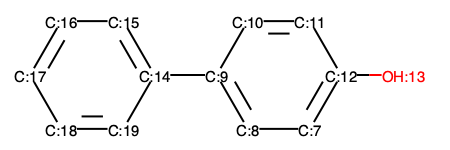

Products: [C:14]1([C:9]2[CH:8]=[CH:7][C:12]([OH:13])=[CH:11][CH:10]=2)[CH:15]=[CH:16][CH:17]=[CH:18][CH:19]=1


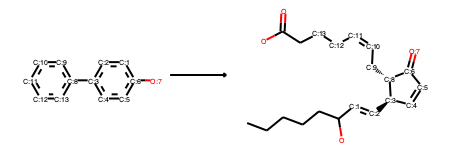

Extracted template: [OH;D1;+0:7]-[c;H0;D3;+0:6]1:[cH;D2;+0:5]:[cH;D2;+0:4]:[c;H0;D3;+0:3](-[c;H0;D3;+0:8]2:[cH;D2;+0:9]:[cH;D2;+0:10]:[cH;D2;+0:11]:[cH;D2;+0:12]:[cH;D2;+0:13]:2):[cH;D2;+0:2]:[cH;D2;+0:1]:1>>C-C-C-C-C-C(-O)/[CH;D2;+0:1]=[CH;D2;+0:2]/[CH;@@;D3;+0:3]1-[CH;D2;+0:4]=[CH;D2;+0:5]-[C;H0;D3;+0:6](=[O;H0;D1;+0:7])-[CH;@;D3;+0:8]-1-[CH2;D2;+0:9]/[CH;D2;+0:10]=[CH;D2;+0:11]\[CH2;D2;+0:12]-[CH2;D2;+0:13]-C-C(-O)=O


1176


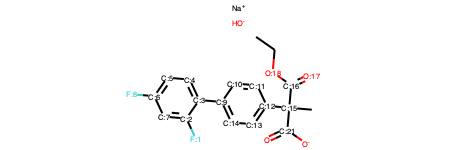

Reactants: [F:1][C:2]1[CH:7]=[C:6]([F:8])[CH:5]=[CH:4][C:3]=1[C:9]1[CH:14]=[CH:13][C:12]([C:15](C)([C:21]([O-])=O)[C:16]([O:18]CC)=[O:17])=[CH:11][CH:10]=1.[OH-].[Na+]


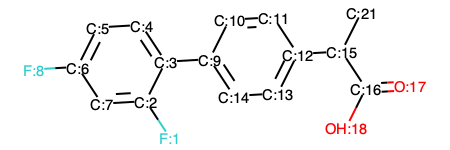

Products: [F:1][C:2]1[CH:7]=[C:6]([F:8])[CH:5]=[CH:4][C:3]=1[C:9]1[CH:14]=[CH:13][C:12]([CH:15]([CH3:21])[C:16]([OH:18])=[O:17])=[CH:11][CH:10]=1


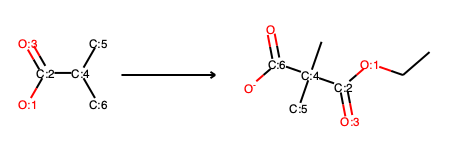

Extracted template: [CH3;D1;+0:6]-[CH;D3;+0:4](-[c:5])-[C:2](=[O;D1;H0:3])-[OH;D1;+0:1]>>C-C-[O;H0;D2;+0:1]-[C:2](=[O;D1;H0:3])-[C;H0;D4;+0:4](-C)(-[c:5])-[C;H0;D3;+0:6](=O)-[O-]


1177


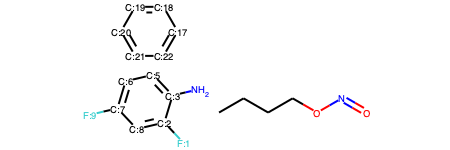

Reactants: [F:1][C:2]1[CH:8]=[C:7]([F:9])[CH:6]=[CH:5][C:3]=1N.N(OCCCC)=O.[CH:17]1[CH:22]=[CH:21][CH:20]=[CH:19][CH:18]=1


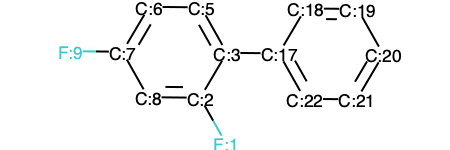

Products: [F:1][C:2]1[CH:8]=[C:7]([F:9])[CH:6]=[CH:5][C:3]=1[C:17]1[CH:22]=[CH:21][CH:20]=[CH:19][CH:18]=1


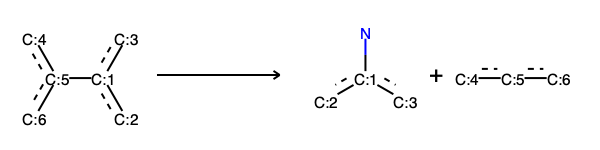

Extracted template: [c:4]:[c;H0;D3;+0:5](:[c:6])-[c;H0;D3;+0:1](:[c:2]):[c:3]>>N-[c;H0;D3;+0:1](:[c:2]):[c:3].[c:4]:[cH;D2;+0:5]:[c:6]


1178


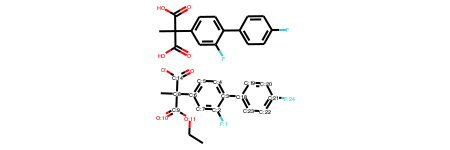

Reactants: [F:1][C:2]1[CH:7]=[C:6]([C:8](C)([C:14]([O-])=O)[C:9]([O:11]CC)=[O:10])[CH:5]=[CH:4][C:3]=1[C:18]1[CH:23]=[CH:22][C:21]([F:24])=[CH:20][CH:19]=1.FC1C=C(C(C)(C(O)=O)C(O)=O)C=CC=1C1C=CC(F)=CC=1


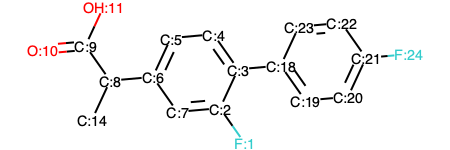

Products: [F:1][C:2]1[CH:7]=[C:6]([CH:8]([CH3:14])[C:9]([OH:11])=[O:10])[CH:5]=[CH:4][C:3]=1[C:18]1[CH:19]=[CH:20][C:21]([F:24])=[CH:22][CH:23]=1


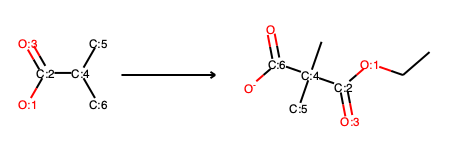

Extracted template: [CH3;D1;+0:6]-[CH;D3;+0:4](-[c:5])-[C:2](=[O;D1;H0:3])-[OH;D1;+0:1]>>C-C-[O;H0;D2;+0:1]-[C:2](=[O;D1;H0:3])-[C;H0;D4;+0:4](-C)(-[c:5])-[C;H0;D3;+0:6](=O)-[O-]


1179


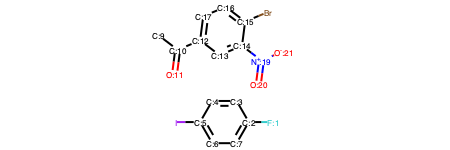

Reactants: [F:1][C:2]1[CH:7]=[CH:6][C:5](I)=[CH:4][CH:3]=1.[CH3:9][C:10]([C:12]1[CH:17]=[CH:16][C:15](Br)=[C:14]([N+:19]([O-:21])=[O:20])[CH:13]=1)=[O:11]


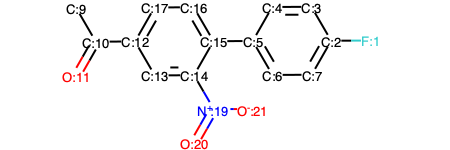

Products: [C:10]([C:12]1[CH:17]=[CH:16][C:15]([C:5]2[CH:6]=[CH:7][C:2]([F:1])=[CH:3][CH:4]=2)=[C:14]([N+:19]([O-:21])=[O:20])[CH:13]=1)(=[O:11])[CH3:9]


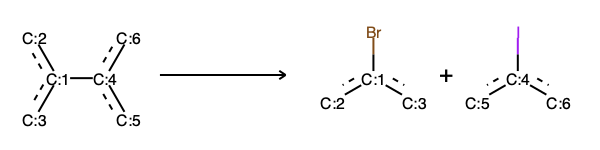

Extracted template: [c:2]:[c;H0;D3;+0:1](:[c:3])-[c;H0;D3;+0:4](:[c:5]):[c:6]>>Br-[c;H0;D3;+0:1](:[c:2]):[c:3].I-[c;H0;D3;+0:4](:[c:5]):[c:6]


1180


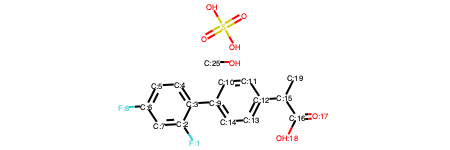

Reactants: [F:1][C:2]1[CH:7]=[C:6]([F:8])[CH:5]=[CH:4][C:3]=1[C:9]1[CH:14]=[CH:13][C:12]([CH:15]([CH3:19])[C:16]([OH:18])=[O:17])=[CH:11][CH:10]=1.S(=O)(=O)(O)O.[CH3:25]O


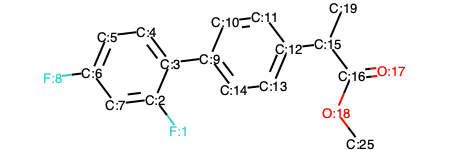

Products: [F:1][C:2]1[CH:7]=[C:6]([F:8])[CH:5]=[CH:4][C:3]=1[C:9]1[CH:14]=[CH:13][C:12]([CH:15]([CH3:19])[C:16]([O:18][CH3:25])=[O:17])=[CH:11][CH:10]=1


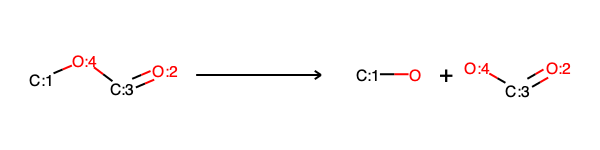

Extracted template: [CH3;D1;+0:1]-[O;H0;D2;+0:4]-[C:3]=[O;D1;H0:2]>>O-[CH3;D1;+0:1].[O;D1;H0:2]=[C:3]-[OH;D1;+0:4]


1182


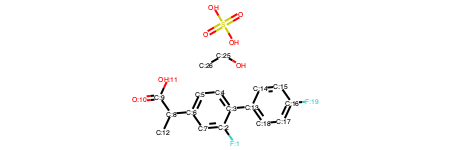

Reactants: [F:1][C:2]1[CH:7]=[C:6]([CH:8]([CH3:12])[C:9]([OH:11])=[O:10])[CH:5]=[CH:4][C:3]=1[C:13]1[CH:18]=[CH:17][C:16]([F:19])=[CH:15][CH:14]=1.S(=O)(=O)(O)O.[CH2:25](O)[CH3:26]


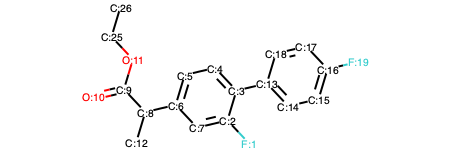

Products: [F:1][C:2]1[CH:7]=[C:6]([CH:8]([CH3:12])[C:9]([O:11][CH2:25][CH3:26])=[O:10])[CH:5]=[CH:4][C:3]=1[C:13]1[CH:14]=[CH:15][C:16]([F:19])=[CH:17][CH:18]=1


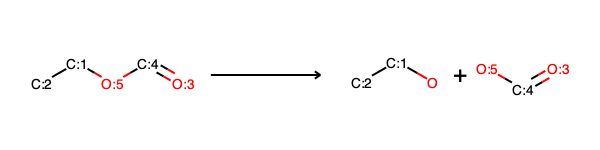

Extracted template: [C;D1;H3:2]-[CH2;D2;+0:1]-[O;H0;D2;+0:5]-[C:4]=[O;D1;H0:3]>>O-[CH2;D2;+0:1]-[C;D1;H3:2].[O;D1;H0:3]=[C:4]-[OH;D1;+0:5]


1183


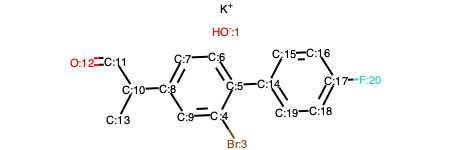

Reactants: [OH-:1].[K+].[Br:3][C:4]1[CH:9]=[C:8]([CH:10]([CH3:13])[CH:11]=[O:12])[CH:7]=[CH:6][C:5]=1[C:14]1[CH:19]=[CH:18][C:17]([F:20])=[CH:16][CH:15]=1


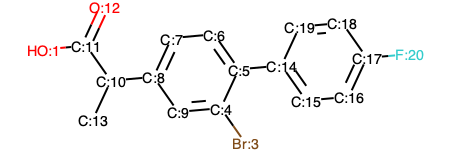

Products: [Br:3][C:4]1[CH:9]=[C:8]([CH:10]([CH3:13])[C:11]([OH:1])=[O:12])[CH:7]=[CH:6][C:5]=1[C:14]1[CH:15]=[CH:16][C:17]([F:20])=[CH:18][CH:19]=1


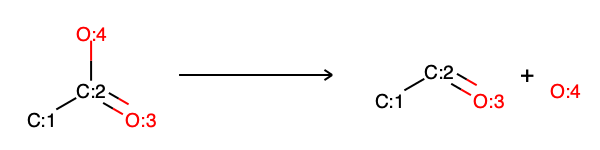

Extracted template: [C:1]-[C;H0;D3;+0:2](=[O;D1;H0:3])-[OH;D1;+0:4]>>[C:1]-[CH;D2;+0:2]=[O;D1;H0:3].[OH-;D0:4]


1184


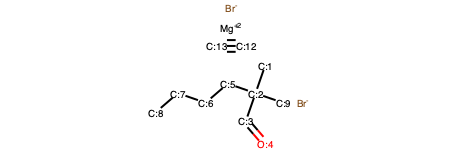

Reactants: [CH3:1][C:2]([CH3:9])([CH2:5][CH2:6][CH2:7][CH3:8])[CH:3]=[O:4].[Br-].[Mg+2].[CH:12]#[CH:13].[Br-]


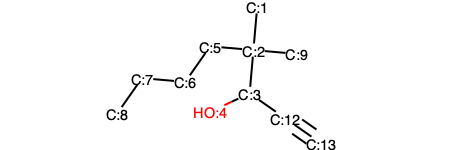

Products: [CH3:1][C:2]([CH3:9])([CH2:5][CH2:6][CH2:7][CH3:8])[CH:3]([OH:4])[C:12]#[CH:13]


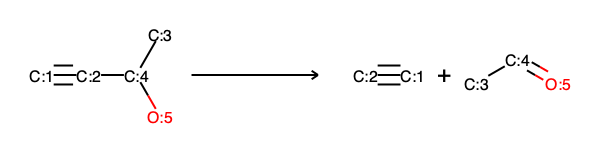

Extracted template: [C:3]-[CH;D3;+0:4](-[OH;D1;+0:5])-[C;H0;D2;+0:2]#[C;D1;H1:1]>>[C;D1;H1:1]#[CH;D1;+0:2].[C:3]-[CH;D2;+0:4]=[O;H0;D1;+0:5]


1185


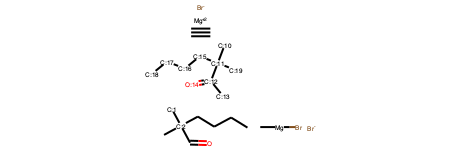

Reactants: [CH3:1][C:2](C)(CCCC)C=O.[CH3:10][C:11]([CH3:19])([CH2:15][CH2:16][CH2:17][CH3:18])[C:12](=[O:14])[CH3:13].C[Mg]Br.[Br-].[Mg+2].C#C.[Br-]


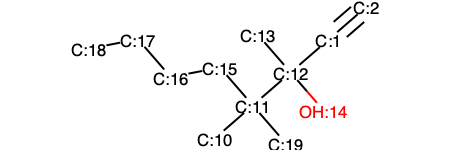

Products: [CH3:13][C:12]([OH:14])([C:11]([CH3:19])([CH3:10])[CH2:15][CH2:16][CH2:17][CH3:18])[C:1]#[CH:2]


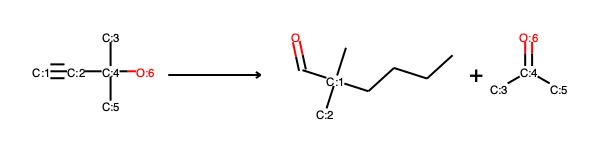

Extracted template: [C:3]-[C;H0;D4;+0:4](-[C;D1;H3:5])(-[OH;D1;+0:6])-[C;H0;D2;+0:2]#[CH;D1;+0:1]>>C-C-C-C-[C;H0;D4;+0:1](-C)(-[CH3;D1;+0:2])-C=O.[C:3]-[C;H0;D3;+0:4](-[C;D1;H3:5])=[O;H0;D1;+0:6]


1186


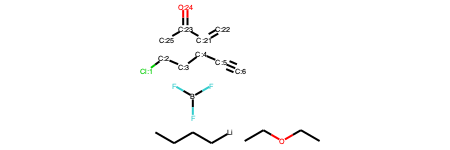

Reactants: [Cl:1][CH2:2][CH2:3][CH2:4][C:5]#[CH:6].C([Li])CCC.B(F)(F)F.CCOCC.[CH:21]([C:23]([CH3:25])=[O:24])=[CH2:22]


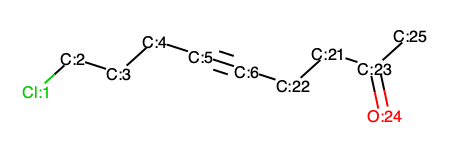

Products: [Cl:1][CH2:2][CH2:3][CH2:4][C:5]#[C:6][CH2:22][CH2:21][C:23](=[O:24])[CH3:25]


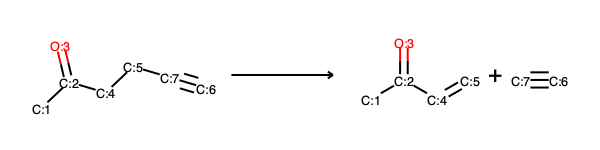

Extracted template: [C:6]#[C;H0;D2;+0:7]-[CH2;D2;+0:5]-[CH2;D2;+0:4]-[C:2](-[C;D1;H3:1])=[O;D1;H0:3]>>[C;D1;H3:1]-[C:2](=[O;D1;H0:3])-[CH;D2;+0:4]=[CH2;D1;+0:5].[C:6]#[CH;D1;+0:7]


1187


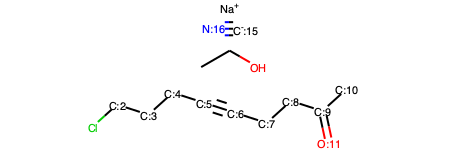

Reactants: Cl[CH2:2][CH2:3][CH2:4][C:5]#[C:6][CH2:7][CH2:8][C:9](=[O:11])[CH3:10].C(O)C.[C-:15]#[N:16].[Na+]


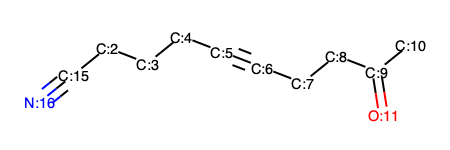

Products: [C:15]([CH2:2][CH2:3][CH2:4][C:5]#[C:6][CH2:7][CH2:8][C:9](=[O:11])[CH3:10])#[N:16]


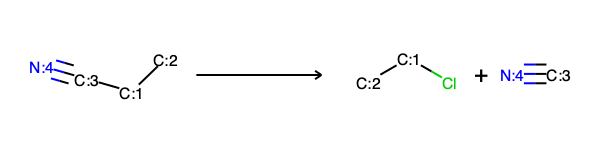

Extracted template: [C:2]-[CH2;D2;+0:1]-[C;H0;D2;+0:3]#[N;D1;H0:4]>>Cl-[CH2;D2;+0:1]-[C:2].[C-;H0;D1:3]#[N;D1;H0:4]


1188


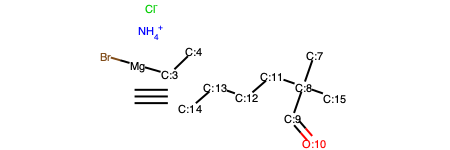

Reactants: C#C.[CH2:3]([Mg]Br)[CH3:4].[CH3:7][C:8]([CH3:15])([CH2:11][CH2:12][CH2:13][CH3:14])[CH:9]=[O:10].[Cl-].[NH4+]


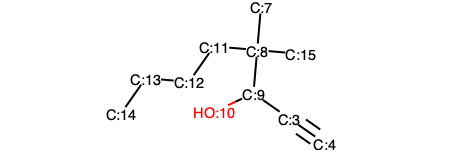

Products: [CH3:7][C:8]([CH3:15])([CH2:11][CH2:12][CH2:13][CH3:14])[CH:9]([OH:10])[C:3]#[CH:4]


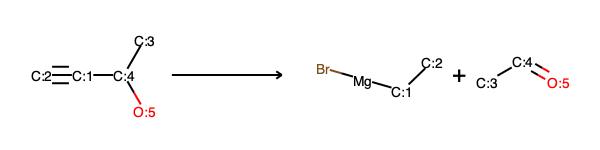

Extracted template: [C:3]-[CH;D3;+0:4](-[OH;D1;+0:5])-[C;H0;D2;+0:1]#[CH;D1;+0:2]>>Br-[Mg]-[CH2;D2;+0:1]-[CH3;D1;+0:2].[C:3]-[CH;D2;+0:4]=[O;H0;D1;+0:5]


1189


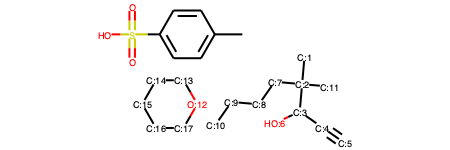

Reactants: [CH3:1][C:2]([CH3:11])([CH2:7][CH2:8][CH2:9][CH3:10])[CH:3]([OH:6])[C:4]#[CH:5].[O:12]1[CH2:17][CH2:16][CH2:15][CH2:14][CH2:13]1.C1(C)C=CC(S(O)(=O)=O)=CC=1


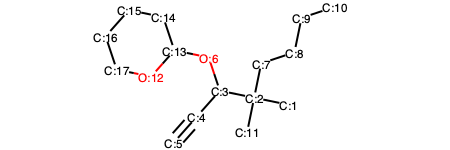

Products: [O:12]1[CH2:17][CH2:16][CH2:15][CH2:14][CH:13]1[O:6][CH:3]([C:2]([CH3:11])([CH3:1])[CH2:7][CH2:8][CH2:9][CH3:10])[C:4]#[CH:5]


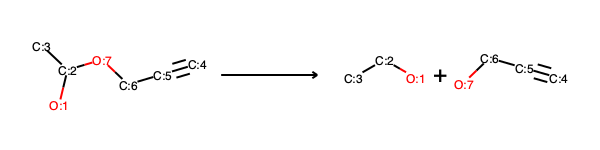

Extracted template: [#8:1]-[CH;D3;+0:2](-[C:3])-[O;H0;D2;+0:7]-[C:6]-[C:5]#[C;D1;H1:4]>>[#8:1]-[CH2;D2;+0:2]-[C:3].[C;D1;H1:4]#[C:5]-[C:6]-[OH;D1;+0:7]


1190


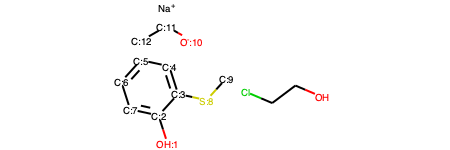

Reactants: [OH:1][C:2]1[CH:7]=[CH:6][CH:5]=[CH:4][C:3]=1[S:8][CH3:9].[O-:10][CH2:11][CH3:12].[Na+].OCCCl


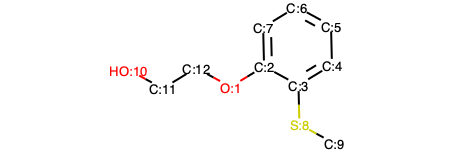

Products: [OH:10][CH2:11][CH2:12][O:1][C:2]1[CH:7]=[CH:6][CH:5]=[CH:4][C:3]=1[S:8][CH3:9]


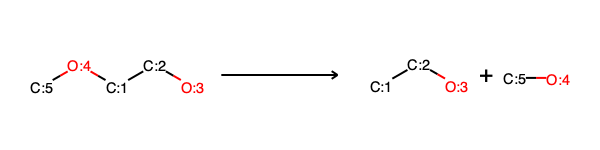

Extracted template: [OH;D1;+0:3]-[C:2]-[CH2;D2;+0:1]-[O;H0;D2;+0:4]-[c:5]>>[CH3;D1;+0:1]-[C:2]-[O-;H0;D1:3].[OH;D1;+0:4]-[c:5]


1191


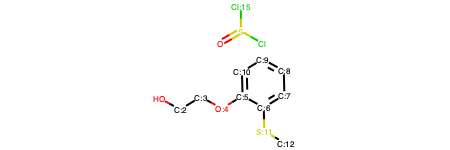

Reactants: O[CH2:2][CH2:3][O:4][C:5]1[CH:10]=[CH:9][CH:8]=[CH:7][C:6]=1[S:11][CH3:12].S(Cl)([Cl:15])=O


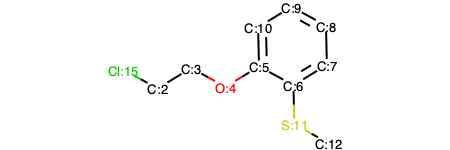

Products: [Cl:15][CH2:2][CH2:3][O:4][C:5]1[CH:10]=[CH:9][CH:8]=[CH:7][C:6]=1[S:11][CH3:12]


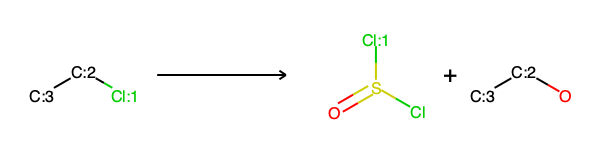

Extracted template: [C:3]-[CH2;D2;+0:2]-[Cl;H0;D1;+0:1]>>Cl-S(=O)-[Cl;H0;D1;+0:1].O-[CH2;D2;+0:2]-[C:3]


1192


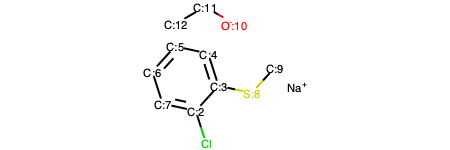

Reactants: Cl[C:2]1[CH:7]=[CH:6][CH:5]=[CH:4][C:3]=1[S:8][CH3:9].[O-:10][CH2:11][CH3:12].[Na+]


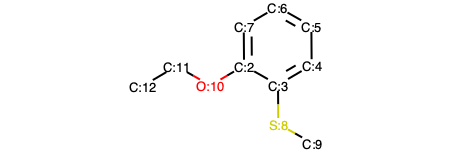

Products: [CH2:11]([O:10][C:2]1[CH:7]=[CH:6][CH:5]=[CH:4][C:3]=1[S:8][CH3:9])[CH3:12]


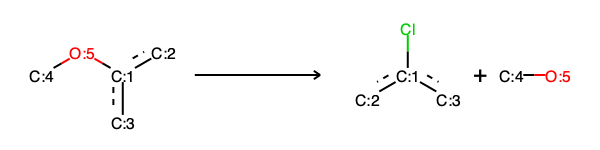

Extracted template: [C:4]-[O;H0;D2;+0:5]-[c;H0;D3;+0:1](:[c:2]):[c:3]>>Cl-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]-[O-;H0;D1:5]


1193


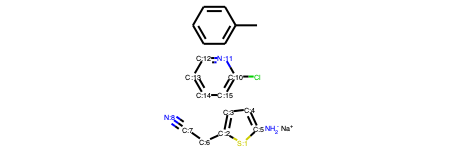

Reactants: [S:1]1[CH:5]=[CH:4][CH:3]=[C:2]1[CH2:6][C:7]#[N:8].Cl[C:10]1[CH:15]=[CH:14][CH:13]=[CH:12][N:11]=1.C1(C)C=CC=CC=1.[NH2-].[Na+]


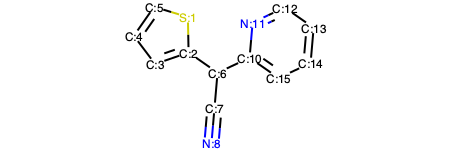

Products: [S:1]1[CH:5]=[CH:4][CH:3]=[C:2]1[CH:6]([C:10]1[CH:15]=[CH:14][CH:13]=[CH:12][N:11]=1)[C:7]#[N:8]


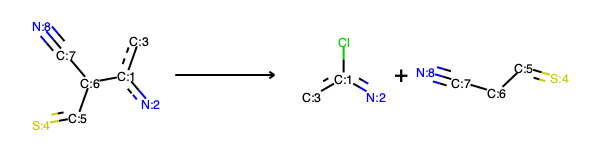

Extracted template: [#16;a:4]:[c:5]-[CH;D3;+0:6](-[C:7]#[N;D1;H0:8])-[c;H0;D3;+0:1](:[#7;a:2]):[c:3]>>Cl-[c;H0;D3;+0:1](:[#7;a:2]):[c:3].[#16;a:4]:[c:5]-[CH2;D2;+0:6]-[C:7]#[N;D1;H0:8]


1194


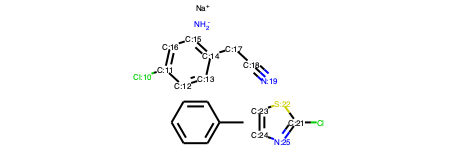

Reactants: [NH2-].[Na+].C1(C)C=CC=CC=1.[Cl:10][C:11]1[CH:16]=[CH:15][C:14]([CH2:17][C:18]#[N:19])=[CH:13][CH:12]=1.Cl[C:21]1[S:22][CH:23]=[CH:24][N:25]=1


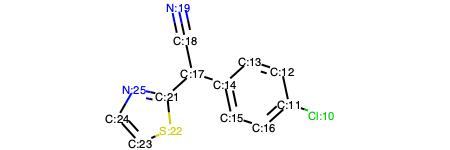

Products: [Cl:10][C:11]1[CH:16]=[CH:15][C:14]([CH:17]([C:21]2[S:22][CH:23]=[CH:24][N:25]=2)[C:18]#[N:19])=[CH:13][CH:12]=1


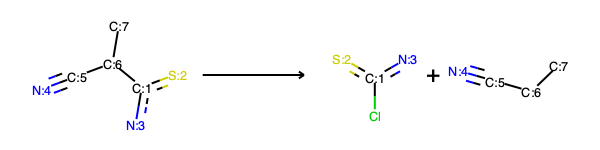

Extracted template: [#16;a:2]:[c;H0;D3;+0:1](:[#7;a:3])-[CH;D3;+0:6](-[c:7])-[C:5]#[N;D1;H0:4]>>Cl-[c;H0;D3;+0:1](:[#16;a:2]):[#7;a:3].[N;D1;H0:4]#[C:5]-[CH2;D2;+0:6]-[c:7]


1195


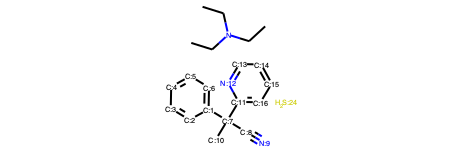

Reactants: [C:1]1([C:7]([C:11]2[CH:16]=[CH:15][CH:14]=[CH:13][N:12]=2)([CH3:10])[C:8]#[N:9])[CH:6]=[CH:5][CH:4]=[CH:3][CH:2]=1.C(N(CC)CC)C.[SH2:24]


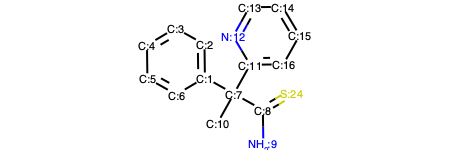

Products: [C:1]1([C:7]([C:11]2[CH:16]=[CH:15][CH:14]=[CH:13][N:12]=2)([CH3:10])[C:8]([NH2:9])=[S:24])[CH:2]=[CH:3][CH:4]=[CH:5][CH:6]=1


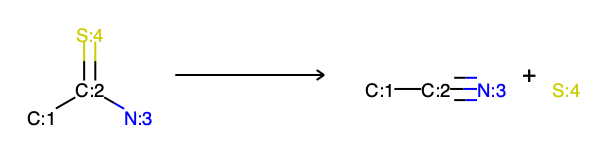

Extracted template: [C:1]-[C;H0;D3;+0:2](-[NH2;D1;+0:3])=[S;H0;D1;+0:4]>>[C:1]-[C;H0;D2;+0:2]#[N;H0;D1;+0:3].[SH2;D0;+0:4]


1196


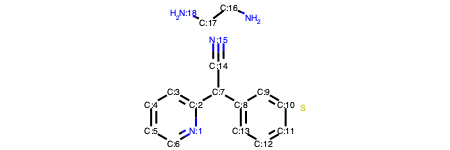

Reactants: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[CH:7]([C:14]#[N:15])[C:8]1[CH:13]=[CH:12][CH:11]=[CH:10][CH:9]=1.[CH2:16](N)[CH2:17][NH2:18].[S]


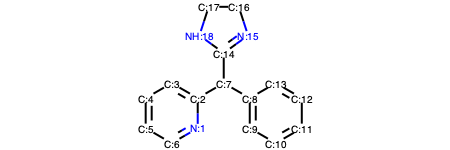

Products: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[CH:7]([C:14]1[NH:18][CH2:17][CH2:16][N:15]=1)[C:8]1[CH:9]=[CH:10][CH:11]=[CH:12][CH:13]=1


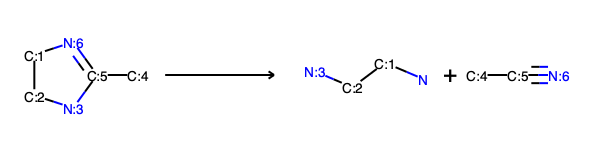

Extracted template: [C:4]-[C;H0;D3;+0:5]1=[N;H0;D2;+0:6]-[CH2;D2;+0:1]-[C:2]-[NH;D2;+0:3]-1>>N-[CH2;D2;+0:1]-[C:2]-[NH2;D1;+0:3].[C:4]-[C;H0;D2;+0:5]#[N;H0;D1;+0:6]


1197


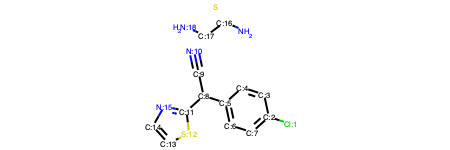

Reactants: [Cl:1][C:2]1[CH:7]=[CH:6][C:5]([CH:8]([C:11]2[S:12][CH:13]=[CH:14][N:15]=2)[C:9]#[N:10])=[CH:4][CH:3]=1.[CH2:16](N)[CH2:17][NH2:18].[S]


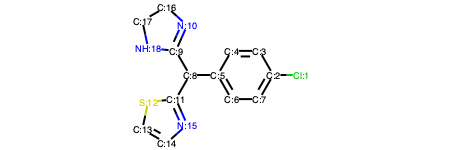

Products: [S:12]1[CH:13]=[CH:14][N:15]=[C:11]1[CH:8]([C:9]1[NH:18][CH2:17][CH2:16][N:10]=1)[C:5]1[CH:6]=[CH:7][C:2]([Cl:1])=[CH:3][CH:4]=1


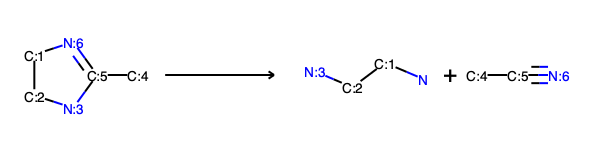

Extracted template: [C:4]-[C;H0;D3;+0:5]1=[N;H0;D2;+0:6]-[CH2;D2;+0:1]-[C:2]-[NH;D2;+0:3]-1>>N-[CH2;D2;+0:1]-[C:2]-[NH2;D1;+0:3].[C:4]-[C;H0;D2;+0:5]#[N;H0;D1;+0:6]


1198


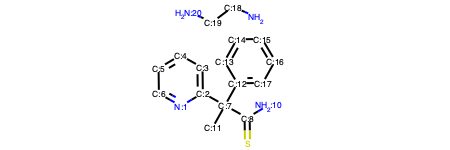

Reactants: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[C:7]([C:12]1[CH:17]=[CH:16][CH:15]=[CH:14][CH:13]=1)([CH3:11])[C:8]([NH2:10])=S.[CH2:18](N)[CH2:19][NH2:20]


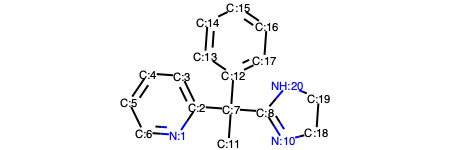

Products: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[C:7]([C:8]1[NH:20][CH2:19][CH2:18][N:10]=1)([CH3:11])[C:12]1[CH:17]=[CH:16][CH:15]=[CH:14][CH:13]=1


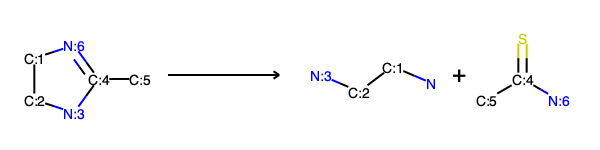

Extracted template: [C:5]-[C;H0;D3;+0:4]1=[N;H0;D2;+0:6]-[CH2;D2;+0:1]-[C:2]-[NH;D2;+0:3]-1>>N-[CH2;D2;+0:1]-[C:2]-[NH2;D1;+0:3].S=[C;H0;D3;+0:4](-[C:5])-[NH2;D1;+0:6]


1199


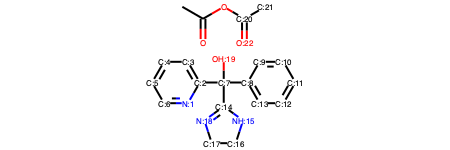

Reactants: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[C:7]([OH:19])([C:14]1[NH:15][CH2:16][CH2:17][N:18]=1)[C:8]1[CH:13]=[CH:12][CH:11]=[CH:10][CH:9]=1.[C:20](OC(=O)C)(=[O:22])[CH3:21]


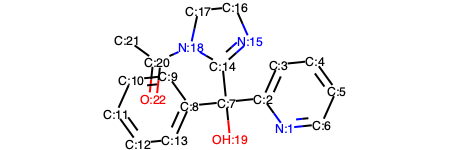

Products: [C:20]([N:18]1[CH2:17][CH2:16][N:15]=[C:14]1[C:7]([C:2]1[CH:3]=[CH:4][CH:5]=[CH:6][N:1]=1)([OH:19])[C:8]1[CH:13]=[CH:12][CH:11]=[CH:10][CH:9]=1)(=[O:22])[CH3:21]


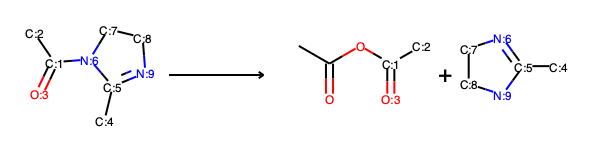

Extracted template: [C:4]-[C;H0;D3;+0:5]1=[N;H0;D2;+0:9]-[C:8]-[C:7]-[N;H0;D3;+0:6]-1-[C;H0;D3;+0:1](-[C;D1;H3:2])=[O;D1;H0:3]>>C-C(=O)-O-[C;H0;D3;+0:1](-[C;D1;H3:2])=[O;D1;H0:3].[C:4]-[C;H0;D3;+0:5]1=[N;H0;D2;+0:6]-[C:7]-[C:8]-[NH;D2;+0:9]-1




In [10]:
for k in range(1150, 1200):
    show_k(k)

#### Good examples

25


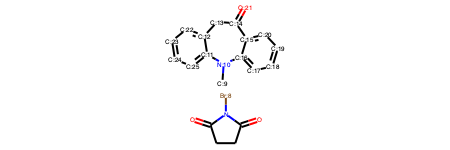

Reactants: C1C(=O)N([Br:8])C(=O)C1.[CH3:9][N:10]1[C:16]2[CH:17]=[CH:18][CH:19]=[CH:20][C:15]=2[C:14](=[O:21])[CH2:13][C:12]2[CH:22]=[CH:23][CH:24]=[CH:25][C:11]1=2


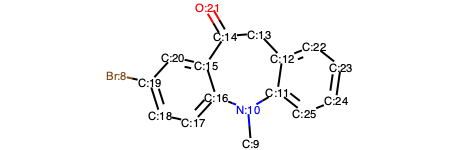

Products: [Br:8][C:19]1[CH:18]=[CH:17][C:16]2[N:10]([CH3:9])[C:11]3[CH:25]=[CH:24][CH:23]=[CH:22][C:12]=3[CH2:13][C:14](=[O:21])[C:15]=2[CH:20]=1


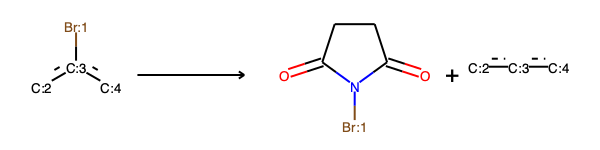

Extracted template: [Br;H0;D1;+0:1]-[c;H0;D3;+0:3](:[c:2]):[c:4]>>O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D2;+0:3]:[c:4]


35


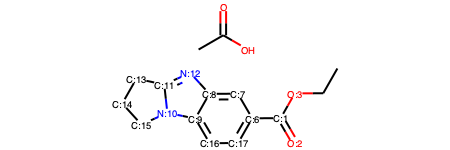

Reactants: [C:1]([C:6]1[CH:17]=[CH:16][C:9]2[N:10]3[CH2:15][CH2:14][CH2:13][C:11]3=[N:12][C:8]=2[CH:7]=1)([O:3]CC)=[O:2].C(O)(=O)C


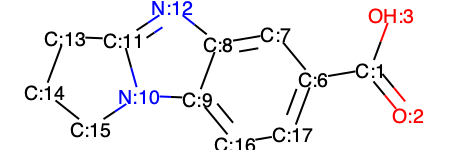

Products: [C:1]([C:6]1[CH:17]=[CH:16][C:9]2[N:10]3[CH2:15][CH2:14][CH2:13][C:11]3=[N:12][C:8]=2[CH:7]=1)([OH:3])=[O:2]


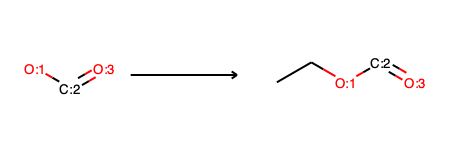

Extracted template: [O;D1;H0:3]=[C:2]-[OH;D1;+0:1]>>C-C-[O;H0;D2;+0:1]-[C:2]=[O;D1;H0:3]


49


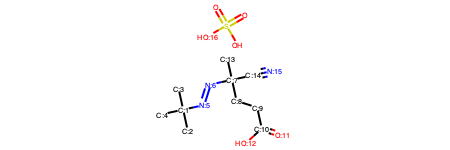

Reactants: [C:1]([N:5]=[N:6][C:7]([C:14]#[N:15])([CH3:13])[CH2:8][CH2:9][C:10]([OH:12])=[O:11])([CH3:4])([CH3:3])[CH3:2].[OH:16]S(O)(=O)=O


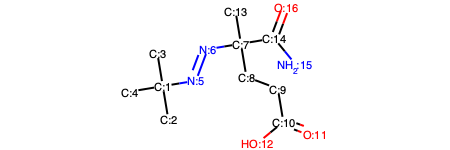

Products: [C:1]([N:5]=[N:6][C:7]([C:14](=[O:16])[NH2:15])([CH3:13])[CH2:8][CH2:9][C:10]([OH:12])=[O:11])([CH3:4])([CH3:2])[CH3:3]


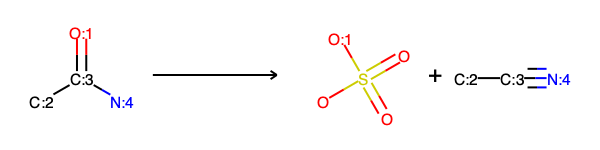

Extracted template: [C:2]-[C;H0;D3;+0:3](-[NH2;D1;+0:4])=[O;H0;D1;+0:1]>>O-S(=O)(=O)-[OH;D1;+0:1].[C:2]-[C;H0;D2;+0:3]#[N;H0;D1;+0:4]


51


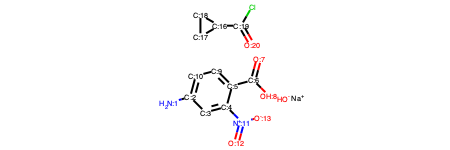

Reactants: [NH2:1][C:2]1[CH:10]=[CH:9][C:5]([C:6]([OH:8])=[O:7])=[C:4]([N+:11]([O-:13])=[O:12])[CH:3]=1.[OH-].[Na+].[CH:16]1([C:19](Cl)=[O:20])[CH2:18][CH2:17]1


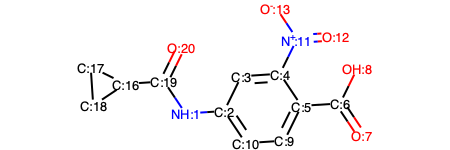

Products: [CH:16]1([C:19]([NH:1][C:2]2[CH:10]=[CH:9][C:5]([C:6]([OH:8])=[O:7])=[C:4]([N+:11]([O-:13])=[O:12])[CH:3]=2)=[O:20])[CH2:18][CH2:17]1


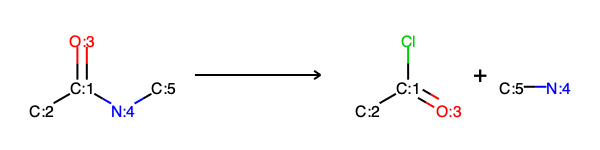

Extracted template: [C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4]-[c:5]>>Cl-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3].[NH2;D1;+0:4]-[c:5]


67


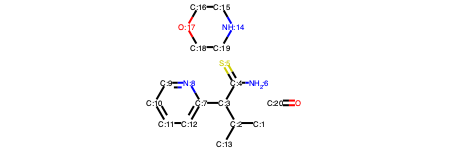

Reactants: [CH3:1][CH:2]([CH3:13])[CH:3]([C:7]1[CH:12]=[CH:11][CH:10]=[CH:9][N:8]=1)[C:4]([NH2:6])=[S:5].[NH:14]1[CH2:19][CH2:18][O:17][CH2:16][CH2:15]1.[CH2:20]=O


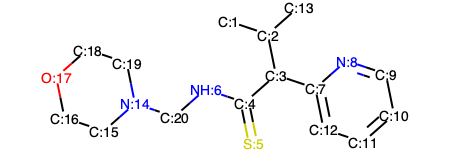

Products: [CH3:1][CH:2]([CH3:13])[CH:3]([C:7]1[CH:12]=[CH:11][CH:10]=[CH:9][N:8]=1)[C:4]([NH:6][CH2:20][N:14]1[CH2:19][CH2:18][O:17][CH2:16][CH2:15]1)=[S:5]


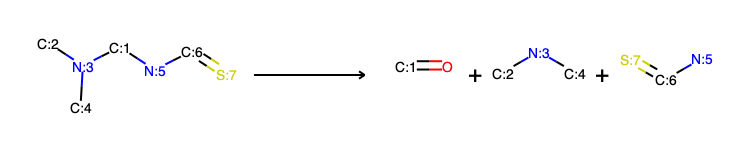

Extracted template: [C:2]-[N;H0;D3;+0:3](-[C:4])-[CH2;D2;+0:1]-[NH;D2;+0:5]-[C:6]=[S;D1;H0:7]>>O=[CH2;D1;+0:1].[C:2]-[NH;D2;+0:3]-[C:4].[NH2;D1;+0:5]-[C:6]=[S;D1;H0:7]


115


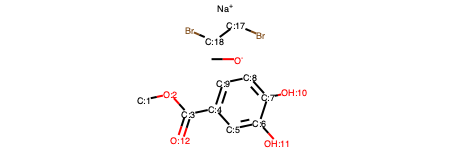

Reactants: [CH3:1][O:2][C:3](=[O:12])[C:4]1[CH:9]=[CH:8][C:7]([OH:10])=[C:6]([OH:11])[CH:5]=1.C[O-].[Na+].Br[CH2:17][CH2:18]Br


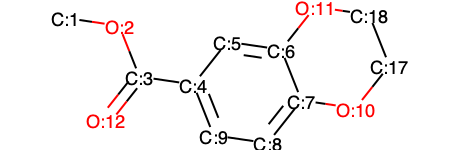

Products: [CH3:1][O:2][C:3](=[O:12])[C:4]1[CH:9]=[CH:8][C:7]2[O:10][CH2:17][CH2:18][O:11][C:6]=2[CH:5]=1


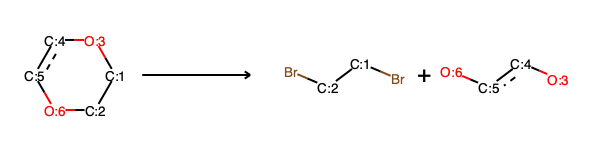

Extracted template: [CH2;D2;+0:1]1-[CH2;D2;+0:2]-[O;H0;D2;+0:6]-[c:5]:[c:4]-[O;H0;D2;+0:3]-1>>Br-[CH2;D2;+0:1]-[CH2;D2;+0:2]-Br.[OH;D1;+0:3]-[c:4]:[c:5]-[OH;D1;+0:6]


119


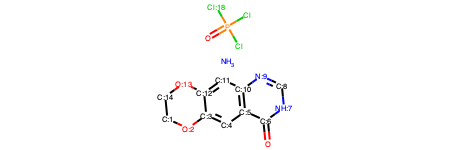

Reactants: [CH2:1]1[CH2:14][O:13][C:12]2[CH:11]=[C:10]3[C:5]([C:6](=O)[NH:7][CH:8]=[N:9]3)=[CH:4][C:3]=2[O:2]1.P(Cl)(Cl)([Cl:18])=O.N


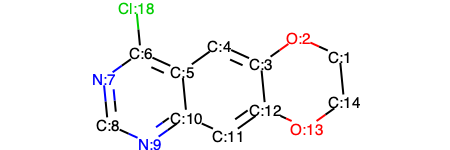

Products: [Cl:18][C:6]1[C:5]2[C:10](=[CH:11][C:12]3[O:13][CH2:14][CH2:1][O:2][C:3]=3[CH:4]=2)[N:9]=[CH:8][N:7]=1


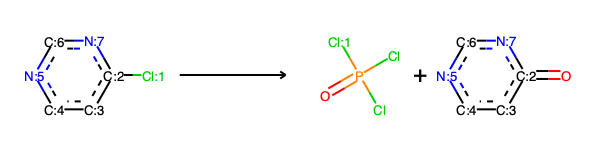

Extracted template: [Cl;H0;D1;+0:1]-[c;H0;D3;+0:2]1:[c:3]:[c:4]:[#7;a:5]:[c:6]:[n;H0;D2;+0:7]:1>>Cl-P(-Cl)(=O)-[Cl;H0;D1;+0:1].O=[c;H0;D3;+0:2]1:[c:3]:[c:4]:[#7;a:5]:[c:6]:[nH;D2;+0:7]:1


126


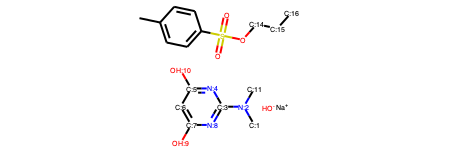

Reactants: [CH3:1][N:2]([CH3:11])[C:3]1[N:8]=[C:7]([OH:9])[CH:6]=[C:5]([OH:10])[N:4]=1.[OH-].[Na+].[CH2:14](OS(C1C=CC(C)=CC=1)(=O)=O)[CH2:15][CH3:16]


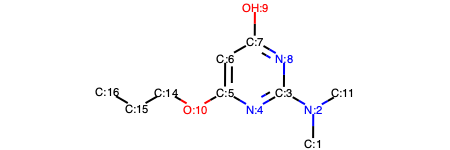

Products: [CH3:1][N:2]([CH3:11])[C:3]1[N:4]=[C:5]([O:10][CH2:14][CH2:15][CH3:16])[CH:6]=[C:7]([OH:9])[N:8]=1


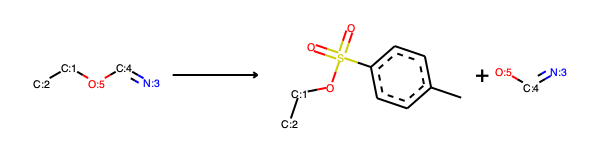

Extracted template: [#7;a:3]:[c:4]-[O;H0;D2;+0:5]-[CH2;D2;+0:1]-[C:2]>>C-c1:c:c:c(-S(=O)(=O)-O-[CH2;D2;+0:1]-[C:2]):c:c:1.[#7;a:3]:[c:4]-[OH;D1;+0:5]


134


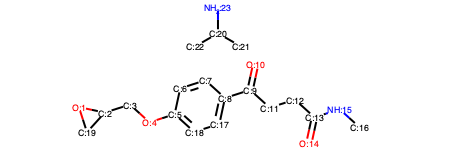

Reactants: [O:1]1[CH2:19][CH:2]1[CH2:3][O:4][C:5]1[CH:18]=[CH:17][C:8]([C:9]([CH2:11][CH2:12][C:13]([NH:15][CH3:16])=[O:14])=[O:10])=[CH:7][CH:6]=1.[CH:20]([NH2:23])([CH3:22])[CH3:21]


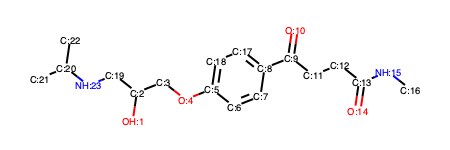

Products: [OH:1][CH:2]([CH2:19][NH:23][CH:20]([CH3:22])[CH3:21])[CH2:3][O:4][C:5]1[CH:18]=[CH:17][C:8]([C:9]([CH2:11][CH2:12][C:13]([NH:15][CH3:16])=[O:14])=[O:10])=[CH:7][CH:6]=1


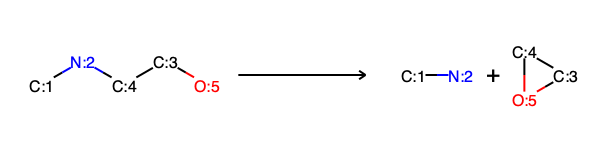

Extracted template: [C:1]-[NH;D2;+0:2]-[CH2;D2;+0:4]-[C:3]-[OH;D1;+0:5]>>[C:1]-[NH2;D1;+0:2].[C:3]1-[CH2;D2;+0:4]-[O;H0;D2;+0:5]-1


168


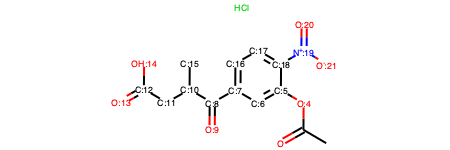

Reactants: C([O:4][C:5]1[CH:6]=[C:7]([CH:16]=[CH:17][C:18]=1[N+:19]([O-:21])=[O:20])[C:8]([CH:10]([CH3:15])[CH2:11][C:12]([OH:14])=[O:13])=[O:9])(=O)C.Cl


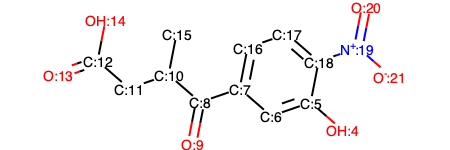

Products: [OH:4][C:5]1[CH:6]=[C:7]([CH:16]=[CH:17][C:18]=1[N+:19]([O-:21])=[O:20])[C:8]([CH:10]([CH3:15])[CH2:11][C:12]([OH:14])=[O:13])=[O:9]


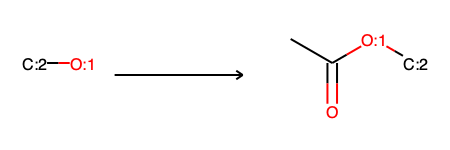

Extracted template: [OH;D1;+0:1]-[c:2]>>C-C(=O)-[O;H0;D2;+0:1]-[c:2]


195


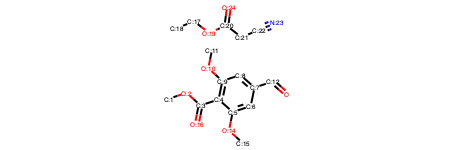

Reactants: [CH3:1][O:2][C:3](=[O:16])[C:4]1[C:9]([O:10][CH3:11])=[CH:8][C:7]([CH:12]=O)=[CH:6][C:5]=1[O:14][CH3:15].[CH2:17]([O:19][C:20](=[O:24])[CH2:21][C:22]#[N:23])[CH3:18]


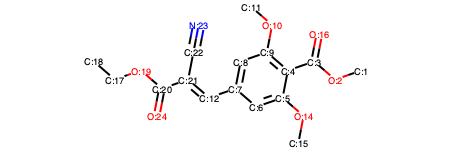

Products: [CH2:17]([O:19][C:20](=[O:24])[C:21]([C:22]#[N:23])=[CH:12][C:7]1[CH:8]=[C:9]([O:10][CH3:11])[C:4]([C:3]([O:2][CH3:1])=[O:16])=[C:5]([O:14][CH3:15])[CH:6]=1)[CH3:18]


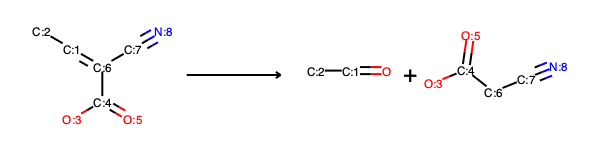

Extracted template: [#8:3]-[C:4](=[O;D1;H0:5])-[C;H0;D3;+0:6](-[C:7]#[N;D1;H0:8])=[CH;D2;+0:1]-[c:2]>>O=[CH;D2;+0:1]-[c:2].[#8:3]-[C:4](=[O;D1;H0:5])-[CH2;D2;+0:6]-[C:7]#[N;D1;H0:8]


242


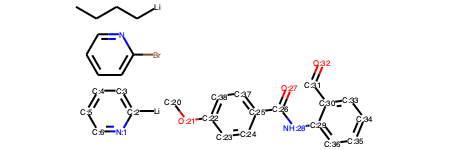

Reactants: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[Li].BrC1C=CC=CN=1.C([Li])CCC.[CH3:20][O:21][C:22]1[CH:38]=[CH:37][C:25]([C:26]([NH:28][C:29]2[CH:36]=[CH:35][CH:34]=[CH:33][C:30]=2[CH:31]=[O:32])=[O:27])=[CH:24][CH:23]=1


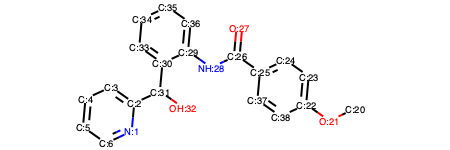

Products: [CH3:20][O:21][C:22]1[CH:23]=[CH:24][C:25]([C:26]([NH:28][C:29]2[CH:36]=[CH:35][CH:34]=[CH:33][C:30]=2[CH:31]([OH:32])[C:2]2[CH:3]=[CH:4][CH:5]=[CH:6][N:1]=2)=[O:27])=[CH:37][CH:38]=1


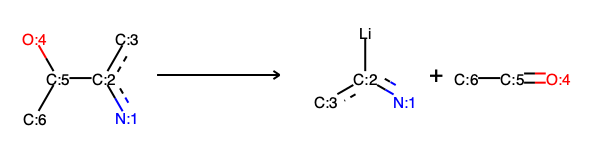

Extracted template: [#7;a:1]:[c;H0;D3;+0:2](:[c:3])-[CH;D3;+0:5](-[OH;D1;+0:4])-[c:6]>>[#7;a:1]:[c;H0;D3;+0:2](-[Li]):[c:3].[O;H0;D1;+0:4]=[CH;D2;+0:5]-[c:6]


250


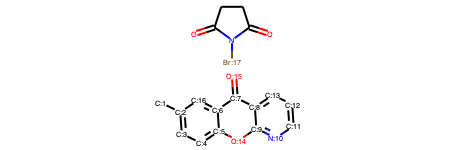

Reactants: [CH3:1][C:2]1[CH:3]=[CH:4][C:5]2[O:14][C:9]3=[N:10][CH:11]=[CH:12][CH:13]=[C:8]3[C:7](=[O:15])[C:6]=2[CH:16]=1.[Br:17]N1C(=O)CCC1=O


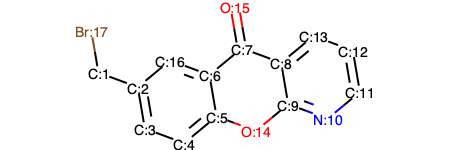

Products: [Br:17][CH2:1][C:2]1[CH:3]=[CH:4][C:5]2[O:14][C:9]3=[N:10][CH:11]=[CH:12][CH:13]=[C:8]3[C:7](=[O:15])[C:6]=2[CH:16]=1


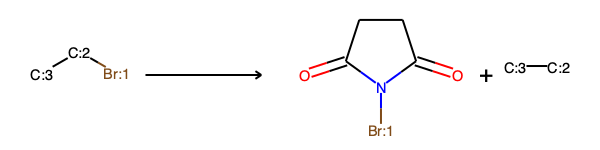

Extracted template: [Br;H0;D1;+0:1]-[CH2;D2;+0:2]-[c:3]>>O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[CH3;D1;+0:2]-[c:3]


1076


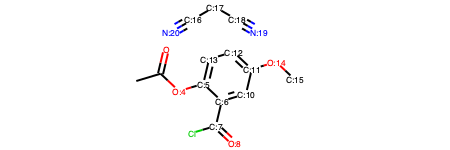

Reactants: C([O:4][C:5]1[CH:13]=[CH:12][C:11]([O:14][CH3:15])=[CH:10][C:6]=1[C:7](Cl)=[O:8])(=O)C.[C:16](#[N:20])[CH2:17][C:18]#[N:19]


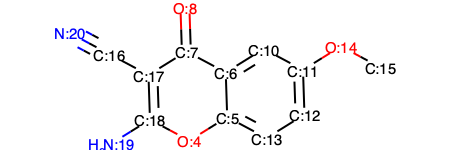

Products: [NH2:19][C:18]1[O:4][C:5]2[CH:13]=[CH:12][C:11]([O:14][CH3:15])=[CH:10][C:6]=2[C:7](=[O:8])[C:17]=1[C:16]#[N:20]


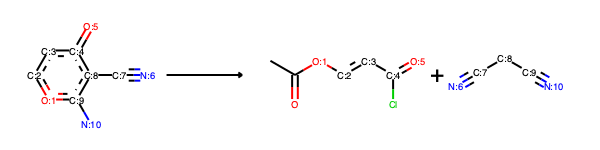

Extracted template: [N;D1;H0:6]#[C:7]-[c;H0;D3;+0:8]1:[c;H0;D3;+0:9](-[NH2;D1;+0:10]):[o;H0;D2;+0:1]:[c:2]:[c:3]:[c;H0;D3;+0:4]:1=[O;D1;H0:5]>>C-C(=O)-[O;H0;D2;+0:1]-[c:2]:[c:3]-[C;H0;D3;+0:4](-Cl)=[O;D1;H0:5].[N;D1;H0:6]#[C:7]-[CH2;D2;+0:8]-[C;H0;D2;+0:9]#[N;H0;D1;+0:10]




In [11]:
good_ks = [25, 35, 49, 51, 67, 115, 119, 126, 134, 168, 195, 242, 250, 1076]
for k in good_ks:
    show_k(k)
with open('example_template_extractions_good.json', 'w') as fid:
    json.dump([templates[k] for k in good_ks], fid, indent=4)


### Good chiral 

129


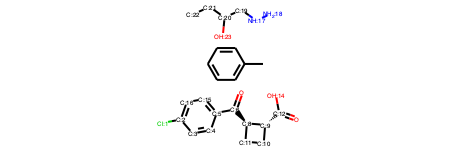

Reactants: [Cl:1][C:2]1[CH:16]=[CH:15][C:5]([C:6]([C@@H:8]2[CH2:11][CH2:10][C@H:9]2[C:12]([OH:14])=O)=O)=[CH:4][CH:3]=1.[NH:17]([CH2:19][CH:20]([OH:23])[CH2:21][CH3:22])[NH2:18].C1(C)C=CC=CC=1


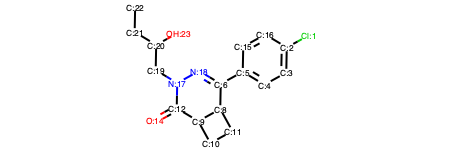

Products: [Cl:1][C:2]1[CH:3]=[CH:4][C:5]([C:6]2[CH:8]3[CH:9]([C:12](=[O:14])[N:17]([CH2:19][CH:20]([OH:23])[CH2:21][CH3:22])[N:18]=2)[CH2:10][CH2:11]3)=[CH:15][CH:16]=1


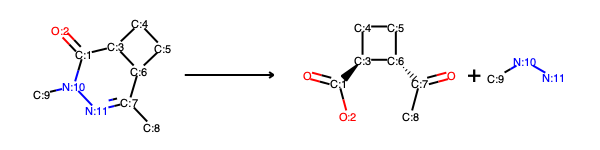

Extracted template: [C:9]-[N;H0;D3;+0:10]1-[N;H0;D2;+0:11]=[C;H0;D3;+0:7](-[c:8])-[CH;D3;+0:6]2-[C:5]-[C:4]-[CH;D3;+0:3]-2-[C;H0;D3;+0:1]-1=[O;H0;D1;+0:2]>>O=[C;H0;D3;+0:1](-[OH;D1;+0:2])-[CH;@;D3;+0:3]1-[C:4]-[C:5]-[CH;@@;D3;+0:6]-1-[C;H0;D3;+0:7](=O)-[c:8].[C:9]-[NH;D2;+0:10]-[NH2;D1;+0:11]


1102


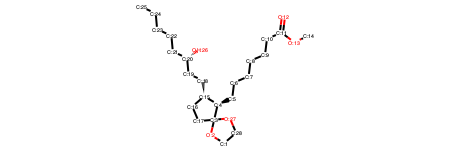

Reactants: [CH2:1]1[CH2:28][O:27][C:3]2([CH2:17][CH2:16][C@H:15]([CH2:18][CH2:19][C@@H:20]([OH:26])[CH2:21][CH2:22][CH2:23][CH2:24][CH3:25])[C@H:4]2[CH2:5][CH2:6][CH2:7][CH2:8][CH2:9][CH2:10][C:11]([O:13][CH3:14])=[O:12])[O:2]1


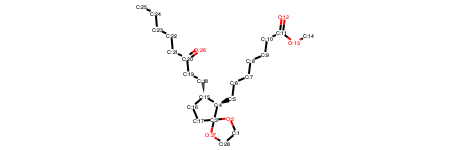

Products: [CH2:28]1[CH2:1][O:2][C:3]2([CH2:17][CH2:16][C@H:15]([CH2:18][CH2:19][C:20](=[O:26])[CH2:21][CH2:22][CH2:23][CH2:24][CH3:25])[C@H:4]2[CH2:5][CH2:6][CH2:7][CH2:8][CH2:9][CH2:10][C:11]([O:13][CH3:14])=[O:12])[O:27]1


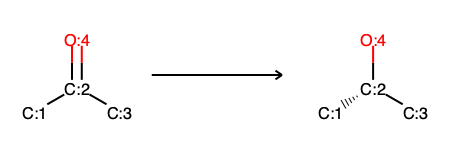

Extracted template: [C:1]-[C;H0;D3;+0:2](-[C:3])=[O;H0;D1;+0:4]>>[C:1]-[CH;@@;D3;+0:2](-[C:3])-[OH;D1;+0:4]


1115


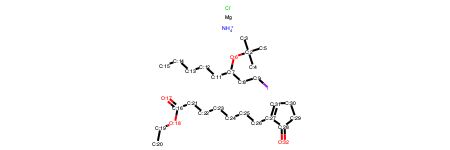

Reactants: [Mg].[C:2]([O:6][CH:7]([CH2:11][CH2:12][CH2:13][CH2:14][CH3:15])[CH2:8][CH2:9]I)([CH3:5])([CH3:4])[CH3:3].[C:16]([CH2:21][CH2:22][CH2:23][CH2:24][CH2:25][CH2:26][C:27]1[C:28](=[O:32])[CH2:29][CH2:30][CH:31]=1)([O:18][CH2:19][CH3:20])=[O:17].[Cl-].[NH4+]


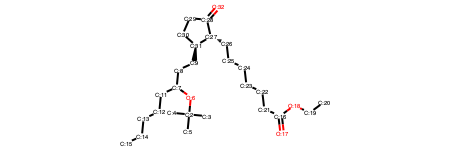

Products: [C:2]([O:6][CH:7]([CH2:11][CH2:12][CH2:13][CH2:14][CH3:15])[CH2:8][CH2:9][C@@H:31]1[C@@H:27]([CH2:26][CH2:25][CH2:24][CH2:23][CH2:22][CH2:21][C:16]([O:18][CH2:19][CH3:20])=[O:17])[C:28](=[O:32])[CH2:29][CH2:30]1)([CH3:5])([CH3:4])[CH3:3]


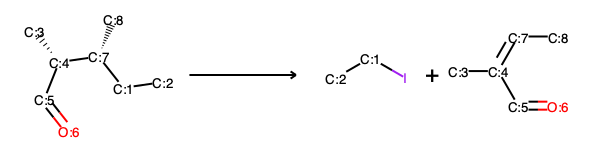

Extracted template: [C:3]-[CH;@@;D3;+0:4](-[C:5]=[O;D1;H0:6])-[CH;@;D3;+0:7](-[C:8])-[CH2;D2;+0:1]-[C:2]>>I-[CH2;D2;+0:1]-[C:2].[C:3]-[C;H0;D3;+0:4](-[C:5]=[O;D1;H0:6])=[CH;D2;+0:7]-[C:8]


3290


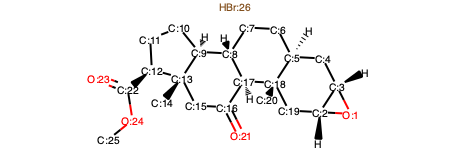

Reactants: [O:1]1[C@H:3]2[CH2:4][C@H:5]3[C@:18]([CH3:20])([CH2:19][C@@H:2]12)[C@@H:17]1[C@H:8]([C@H:9]2[C@@:13]([CH2:15][C:16]1=[O:21])([CH3:14])[C@@H:12]([C:22]([O:24][CH3:25])=[O:23])[CH2:11][CH2:10]2)[CH2:7][CH2:6]3.[BrH:26]


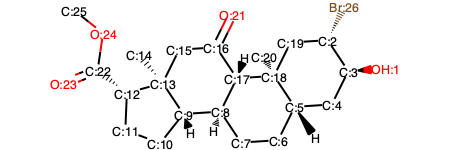

Products: [Br:26][C@H:2]1[CH2:19][C@@:18]2([CH3:20])[C@@H:5]([CH2:6][CH2:7][C@@H:8]3[C@@H:17]2[C:16](=[O:21])[CH2:15][C@@:13]2([CH3:14])[C@H:9]3[CH2:10][CH2:11][C@@H:12]2[C:22]([O:24][CH3:25])=[O:23])[CH2:4][C@@H:3]1[OH:1]


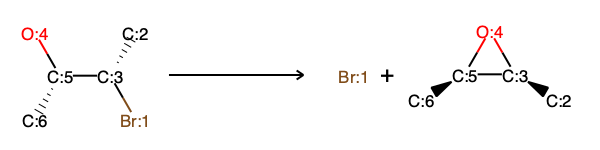

Extracted template: [Br;H0;D1;+0:1]-[CH;@@;D3;+0:3](-[C:2])-[CH;@;D3;+0:5](-[C:6])-[OH;D1;+0:4]>>[BrH;D0;+0:1].[C:2]-[CH;@@;D3;+0:3]1-[O;H0;D2;+0:4]-[CH;@@;D3;+0:5]-1-[C:6]


8144


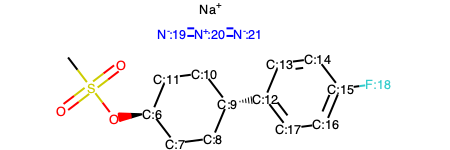

Reactants: CS(O[C@H:6]1[CH2:11][CH2:10][C@H:9]([C:12]2[CH:17]=[CH:16][C:15]([F:18])=[CH:14][CH:13]=2)[CH2:8][CH2:7]1)(=O)=O.[N-:19]=[N+:20]=[N-:21].[Na+]


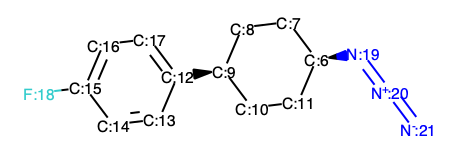

Products: [F:18][C:15]1[CH:16]=[CH:17][C:12]([C@@H:9]2[CH2:10][CH2:11][C@H:6]([N:19]=[N+:20]=[N-:21])[CH2:7][CH2:8]2)=[CH:13][CH:14]=1


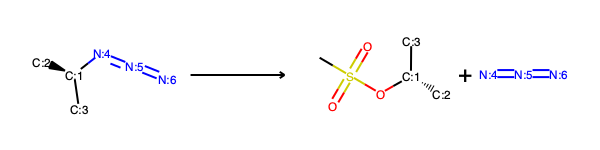

Extracted template: [C:2]-[CH;@;D3;+0:1](-[C:3])-[N;H0;D2;+0:4]=[#7;+:5]=[N;-;D1;H0:6]>>C-S(=O)(=O)-O-[CH;@@;D3;+0:1](-[C:2])-[C:3].[N-;H0;D1:4]=[#7;+:5]=[N;-;D1;H0:6]




In [56]:
good_chiral_ks = [129, 1102, 1115, 3290, 8144]
for k in good_chiral_ks:
    show_k(k)

### Bad

69


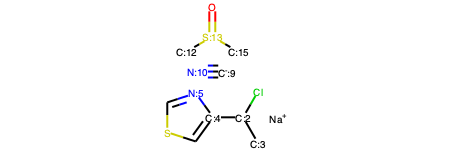

Reactants: Cl[CH:2]([C:4]1[N:5]=CSC=1)[CH3:3].[C-:9]#[N:10].[Na+].[CH3:12][S:13]([CH3:15])=O


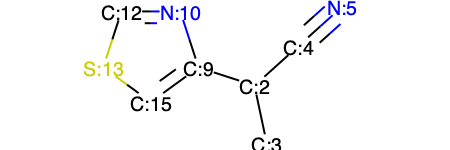

Products: [S:13]1[CH:15]=[C:9]([CH:2]([CH3:3])[C:4]#[N:5])[N:10]=[CH:12]1


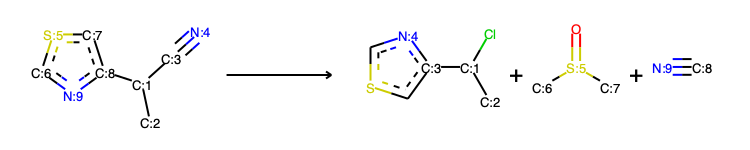

Extracted template: [C;D1;H3:2]-[CH;D3;+0:1](-[C;H0;D2;+0:3]#[N;H0;D1;+0:4])-[c;H0;D3;+0:8]1:[cH;D2;+0:7]:[s;H0;D2;+0:5]:[cH;D2;+0:6]:[n;H0;D2;+0:9]:1>>Cl-[CH;D3;+0:1](-[C;D1;H3:2])-[c;H0;D3;+0:3]1:[n;H0;D2;+0:4]:c:s:c:1.O=[S;H0;D3;+0:5](-[CH3;D1;+0:6])-[CH3;D1;+0:7].[C-;H0;D1:8]#[N;H0;D1;+0:9]


97


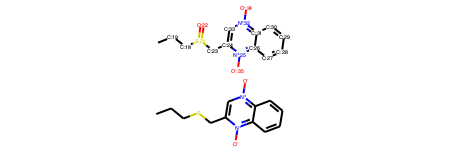

Reactants: C(SCC1C=[N+]([O-])C2C(=CC=CC=2)[N+]=1[O-])CC.[CH2:18]([S:21]([CH2:23][C:24]1[CH:33]=[N+:32]([O-:34])[C:31]2[C:26](=[CH:27][CH:28]=[CH:29][CH:30]=2)[N+:25]=1[O-:35])=[O:22])[CH2:19]C


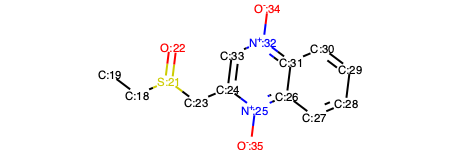

Products: [CH2:18]([S:21]([CH2:23][C:24]1[CH:33]=[N+:32]([O-:34])[C:31]2[C:26](=[CH:27][CH:28]=[CH:29][CH:30]=2)[N+:25]=1[O-:35])=[O:22])[CH3:19]


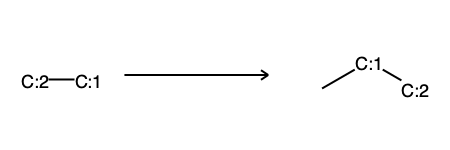

Extracted template: [C:2]-[CH3;D1;+0:1]>>C-[CH2;D2;+0:1]-[C:2]




In [12]:
bad_ks = [69, 97]
for k in bad_ks:
    show_k(k)
with open('example_template_extractions_bad.json', 'w') as fid:
    json.dump([templates[k] for k in bad_ks], fid, indent=4)